<span style='font-size:large'><span style='font-size:x-large'>**SC1015 Data Science and Artificial Intelligence**</span></span>

<span style='font-size:x-large'>**Analysis of Life Expectancy Dataset**</span>

<span style='font-size:large'>**Done by: Anthony Soon \(U2222577H\), Benjamin Fernandez \(U2220316G\), Goh Yi Heng \(U2222525C\)**</span>

<span style='font-size:large'>**Lab Group: Z136 Group 1**</span>


In [2]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [3]:
traindata = pd.read_csv('Life Expectancy Data.csv')
traindata.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [4]:
traindata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

Total Rows: 2938  



<span style='font-size:large'>**CLEANING DATA:**</span>

- Removing incomplete entries
- Removing non\-numerical entries



In [5]:
Life_Expectancy = traindata.dropna() #removing null entries
Life_Expectancy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1649 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          1649 non-null   object 
 1   Year                             1649 non-null   int64  
 2   Status                           1649 non-null   object 
 3   Life expectancy                  1649 non-null   float64
 4   Adult Mortality                  1649 non-null   float64
 5   infant deaths                    1649 non-null   int64  
 6   Alcohol                          1649 non-null   float64
 7   percentage expenditure           1649 non-null   float64
 8   Hepatitis B                      1649 non-null   float64
 9   Measles                          1649 non-null   int64  
 10   BMI                             1649 non-null   float64
 11  under-five deaths                1649 non-null   int64  
 12  Polio               

**Removing NULL objects:**  



**Drop "Status" and "Country" \(non\-numeric\)**  



In [8]:
LE = Life_Expectancy.drop(columns = ["Status", "Country"])
LE.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1649 entries, 0 to 2937
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Year                             1649 non-null   int64  
 1   Life expectancy                  1649 non-null   float64
 2   Adult Mortality                  1649 non-null   float64
 3   infant deaths                    1649 non-null   int64  
 4   Alcohol                          1649 non-null   float64
 5   percentage expenditure           1649 non-null   float64
 6   Hepatitis B                      1649 non-null   float64
 7   Measles                          1649 non-null   int64  
 8    BMI                             1649 non-null   float64
 9   under-five deaths                1649 non-null   int64  
 10  Polio                            1649 non-null   float64
 11  Total expenditure                1649 non-null   float64
 12  Diphtheria          

<AxesSubplot: >

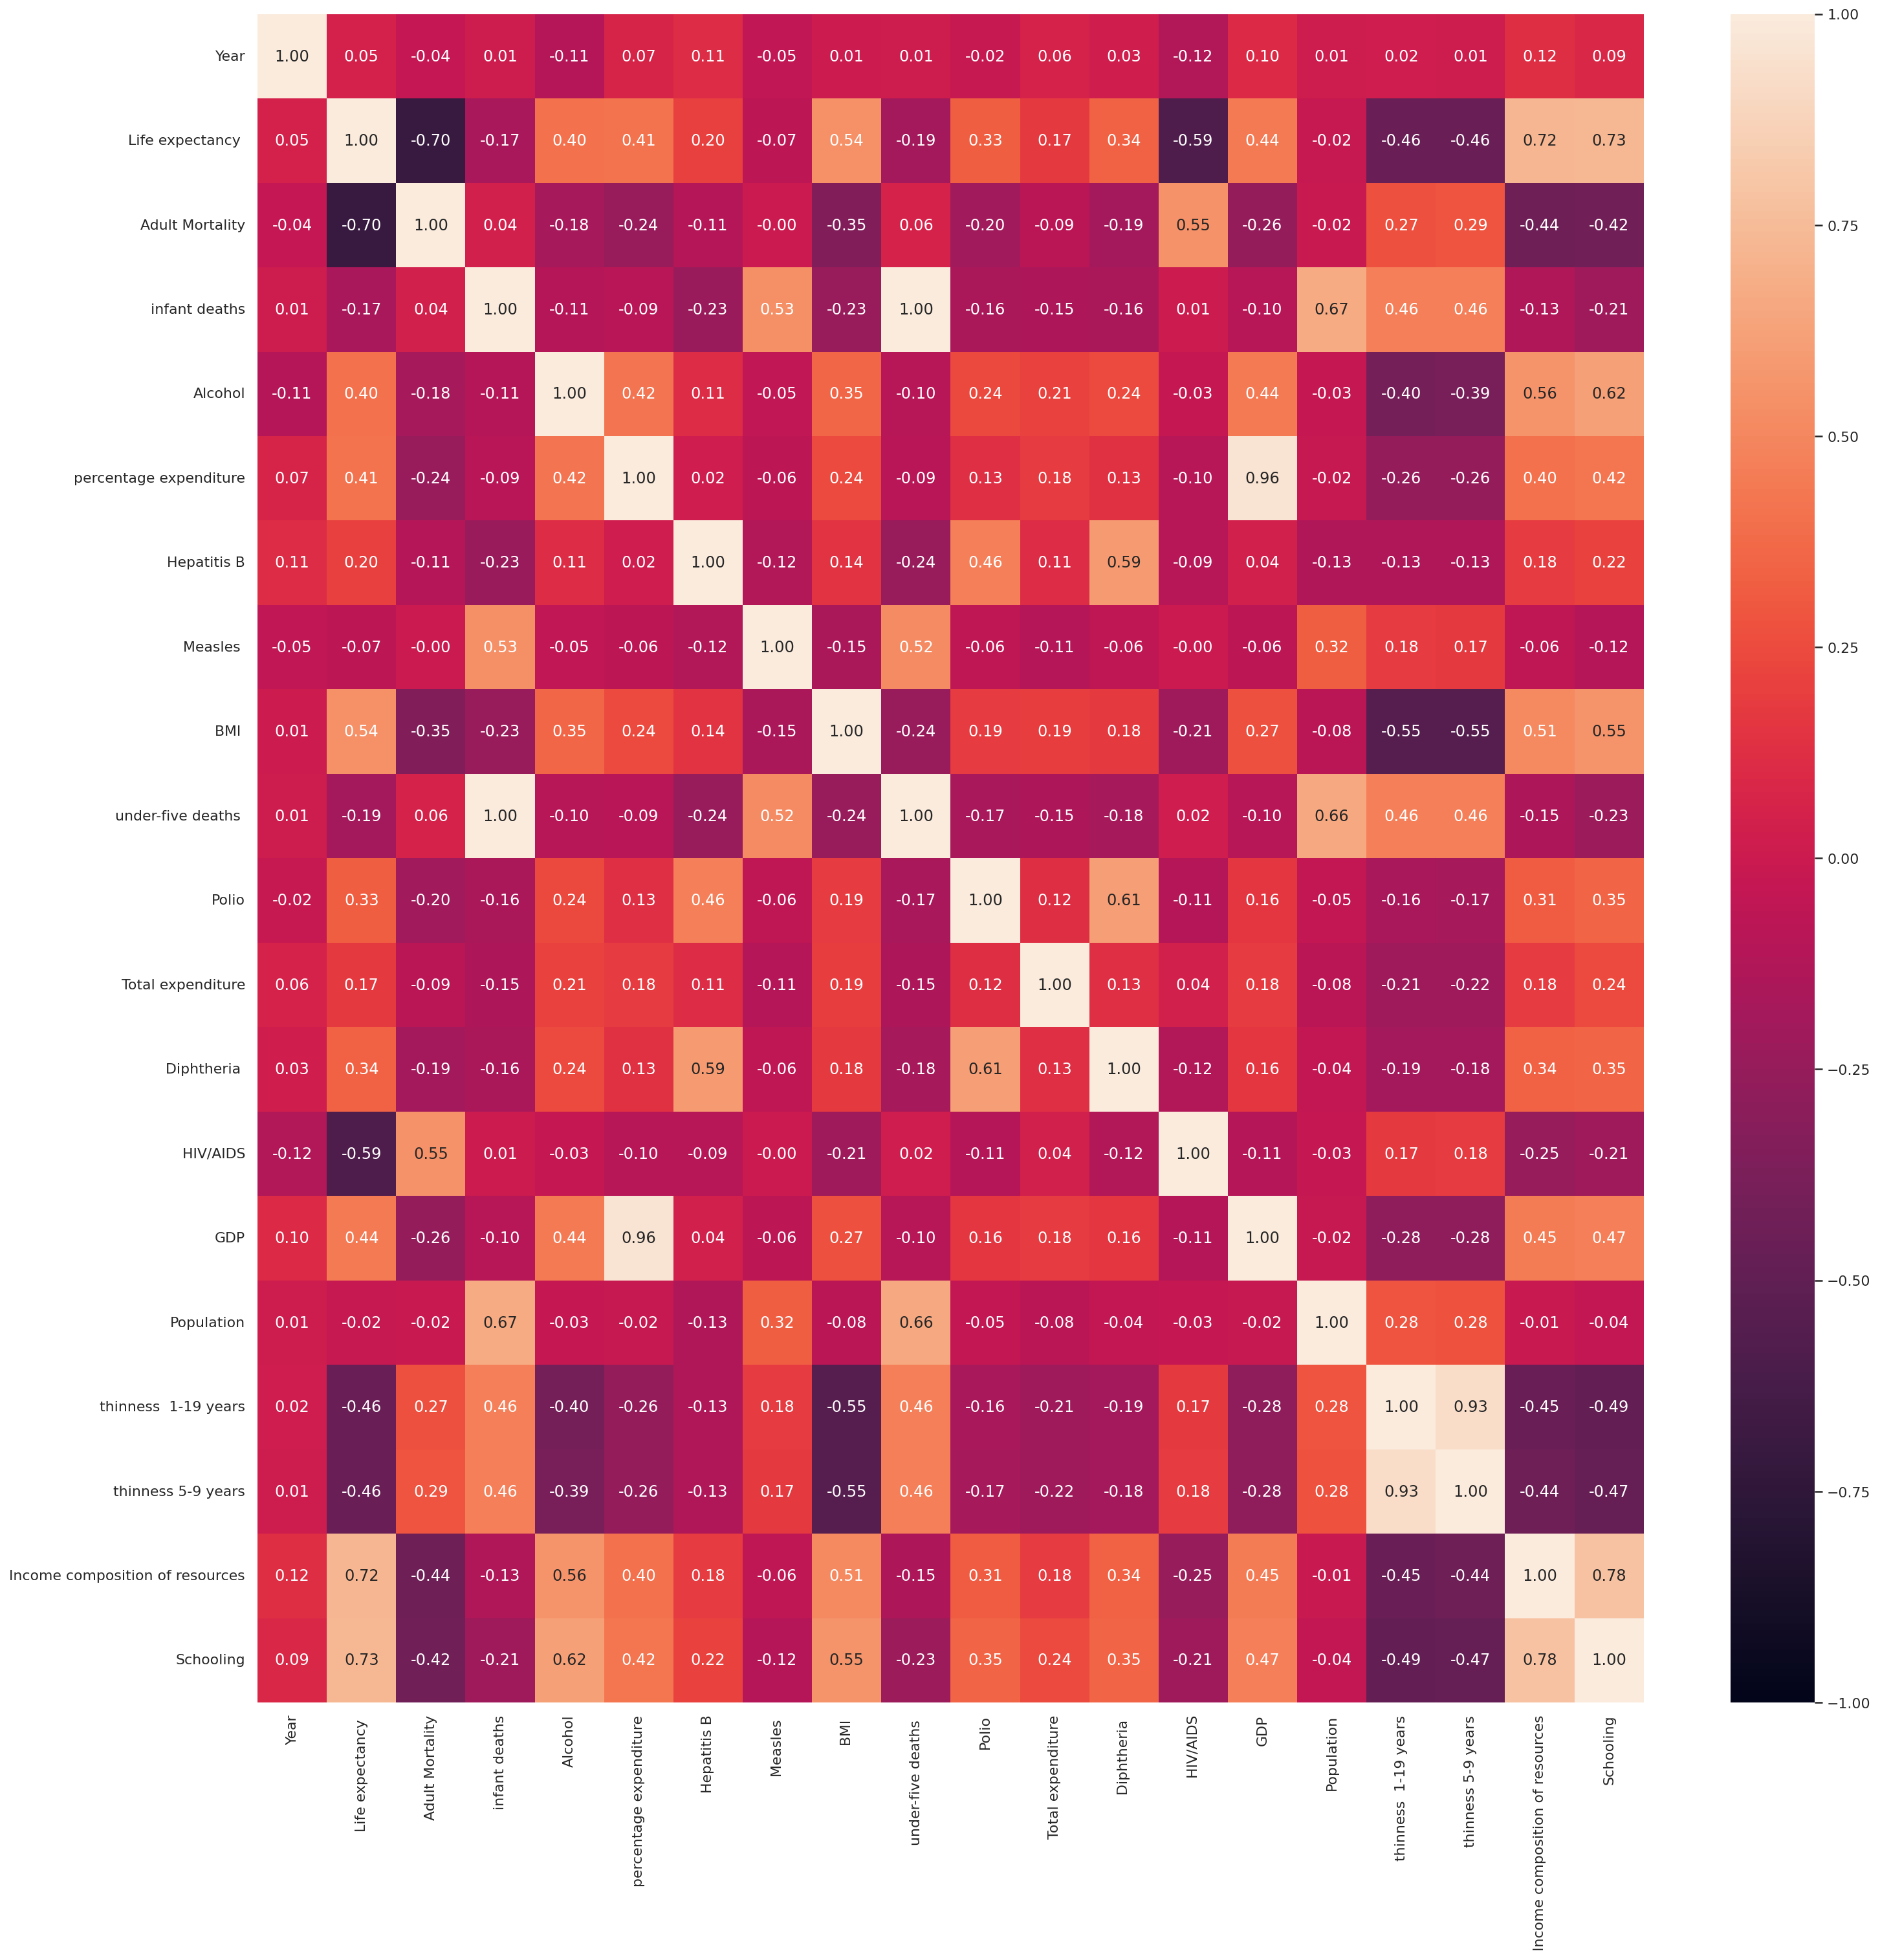

In [9]:
# Heatmap of the Correlation Matrix
f = plt.figure(figsize=(24, 24))
sb.heatmap(LE.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")

**From Correlation Matrix:**

**Ranking based on the**   
**magnitude of correlation:** 

1. Schooling \(0.73\)
2. Income Composition of resources \(0.72\)
3. Adult Mortality \(\-0.70\)
4. HIV/AIDS \(\-0.59\)
5. BMI \(0.54\)



The top 3 factors with the highest correlation is used to plot linear regressions.

The sample size of 2937 for each factor will be split into an approximate ratio of 7:3 for train and test set\(2056 and 881 samples respectively\).



In [10]:
LE.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1649 entries, 0 to 2937
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Year                             1649 non-null   int64  
 1   Life expectancy                  1649 non-null   float64
 2   Adult Mortality                  1649 non-null   float64
 3   infant deaths                    1649 non-null   int64  
 4   Alcohol                          1649 non-null   float64
 5   percentage expenditure           1649 non-null   float64
 6   Hepatitis B                      1649 non-null   float64
 7   Measles                          1649 non-null   int64  
 8    BMI                             1649 non-null   float64
 9   under-five deaths                1649 non-null   int64  
 10  Polio                            1649 non-null   float64
 11  Total expenditure                1649 non-null   float64
 12  Diphtheria          

In [11]:
life_exp = pd.DataFrame(LE['Life expectancy '])
schooling = pd.DataFrame(LE['Schooling'])
incomecomp = pd.DataFrame(LE['Income composition of resources'])
a_mortality = pd.DataFrame(LE['Adult Mortality'])

**Linear Regression for Schooling with respect to LE**


In [12]:
# Train Set : 1154 samples
schooling_train = pd.DataFrame(schooling[:1154])
life_exp_train = pd.DataFrame(life_exp[:1154])

# Test Set : 495 samples
schooling_test = pd.DataFrame(schooling[-495:])
life_exp_test = pd.DataFrame(life_exp[-495:])

# Check the sample sizes
print("Train Set :", schooling_train.shape, life_exp_train.shape)
print("Test Set  :", schooling_test.shape, life_exp_test.shape)

Train Set : (1154, 1) (1154, 1)
Test Set  : (495, 1) (495, 1)


In [13]:
# Summary Statistics for Schooling Train
schooling_train.describe()

,Schooling
count,1154.000000
mean,12.068111
std,3.001648
min,4.200000
25%,10.100000
50%,12.300000
75%,14.100000
max,20.700000


In [14]:
# Summary Statistics for Total Train
life_exp_train.describe()

,Life expectancy
count,1154.000000
mean,69.694367
std,8.909123
min,44.000000
25%,64.125000
50%,72.000000
75%,75.600000
max,89.000000


<AxesSubplot: >

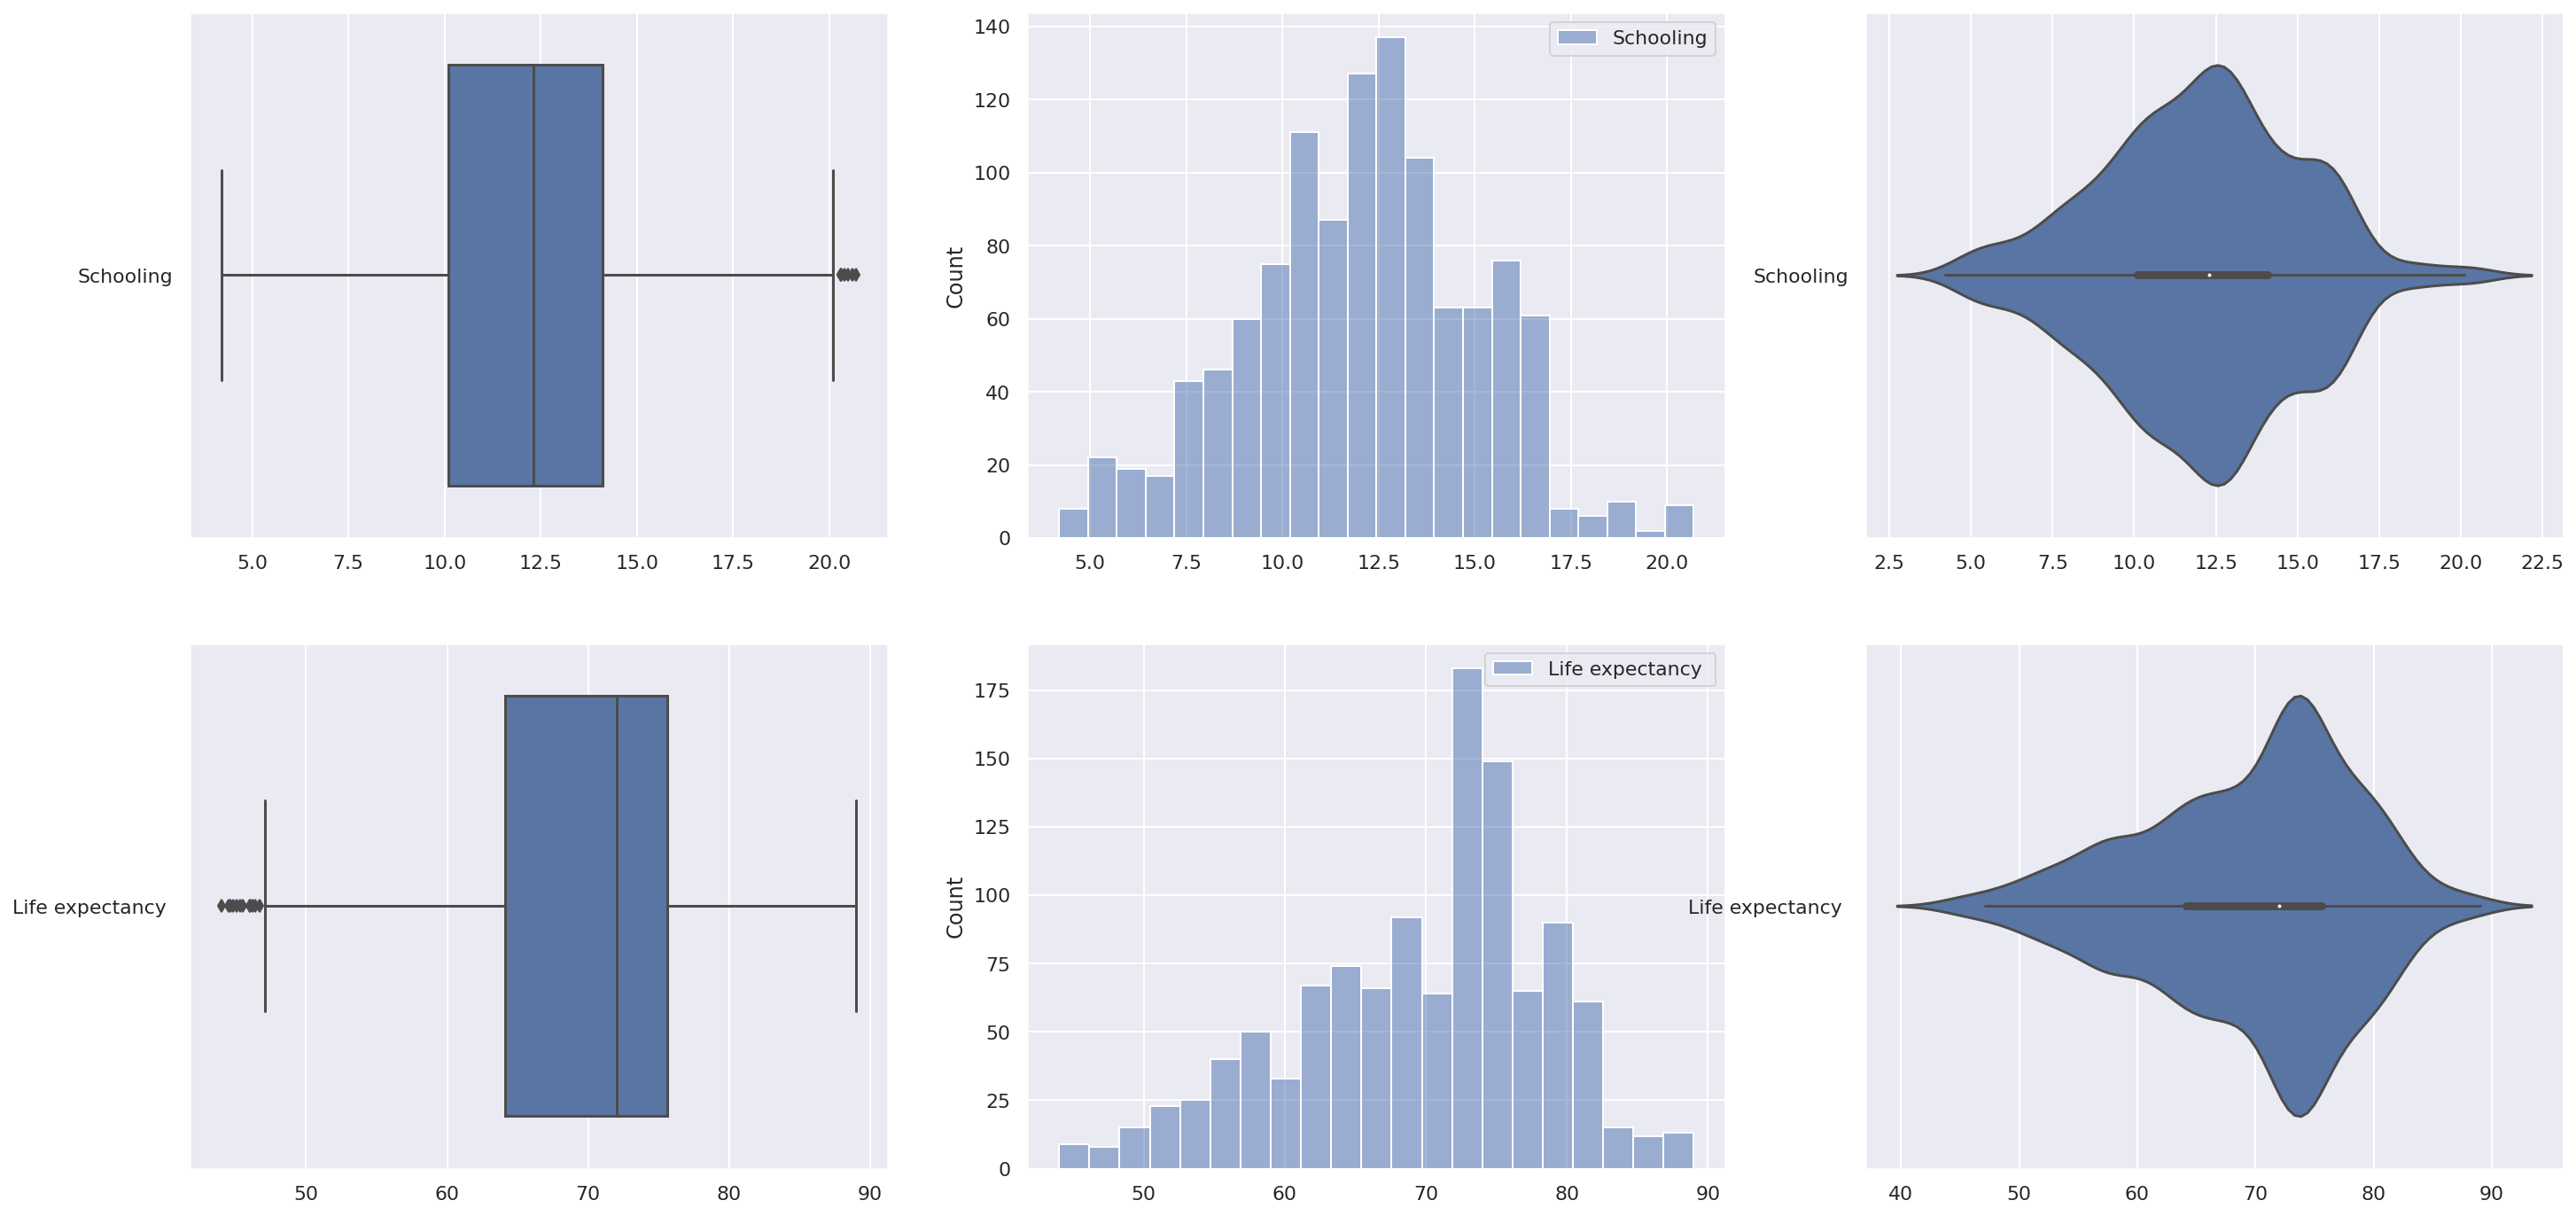

In [15]:
# Set up matplotlib figure with three subplots
f, axes = plt.subplots(2, 3, figsize=(24, 12))

# Plot the basic uni-variate figures for Schooling Train
sb.boxplot(data = schooling_train, orient = "h", ax = axes[0,0])
sb.histplot(data = schooling_train, ax = axes[0,1])
sb.violinplot(data = schooling_train, orient = "h", ax = axes[0,2])

# Plot the basic uni-variate figures for LE Train
sb.boxplot(data = life_exp_train, orient = "h", ax = axes[1,0])
sb.histplot(data = life_exp_train, ax = axes[1,1])
sb.violinplot(data = life_exp_train, orient = "h", ax = axes[1,2])

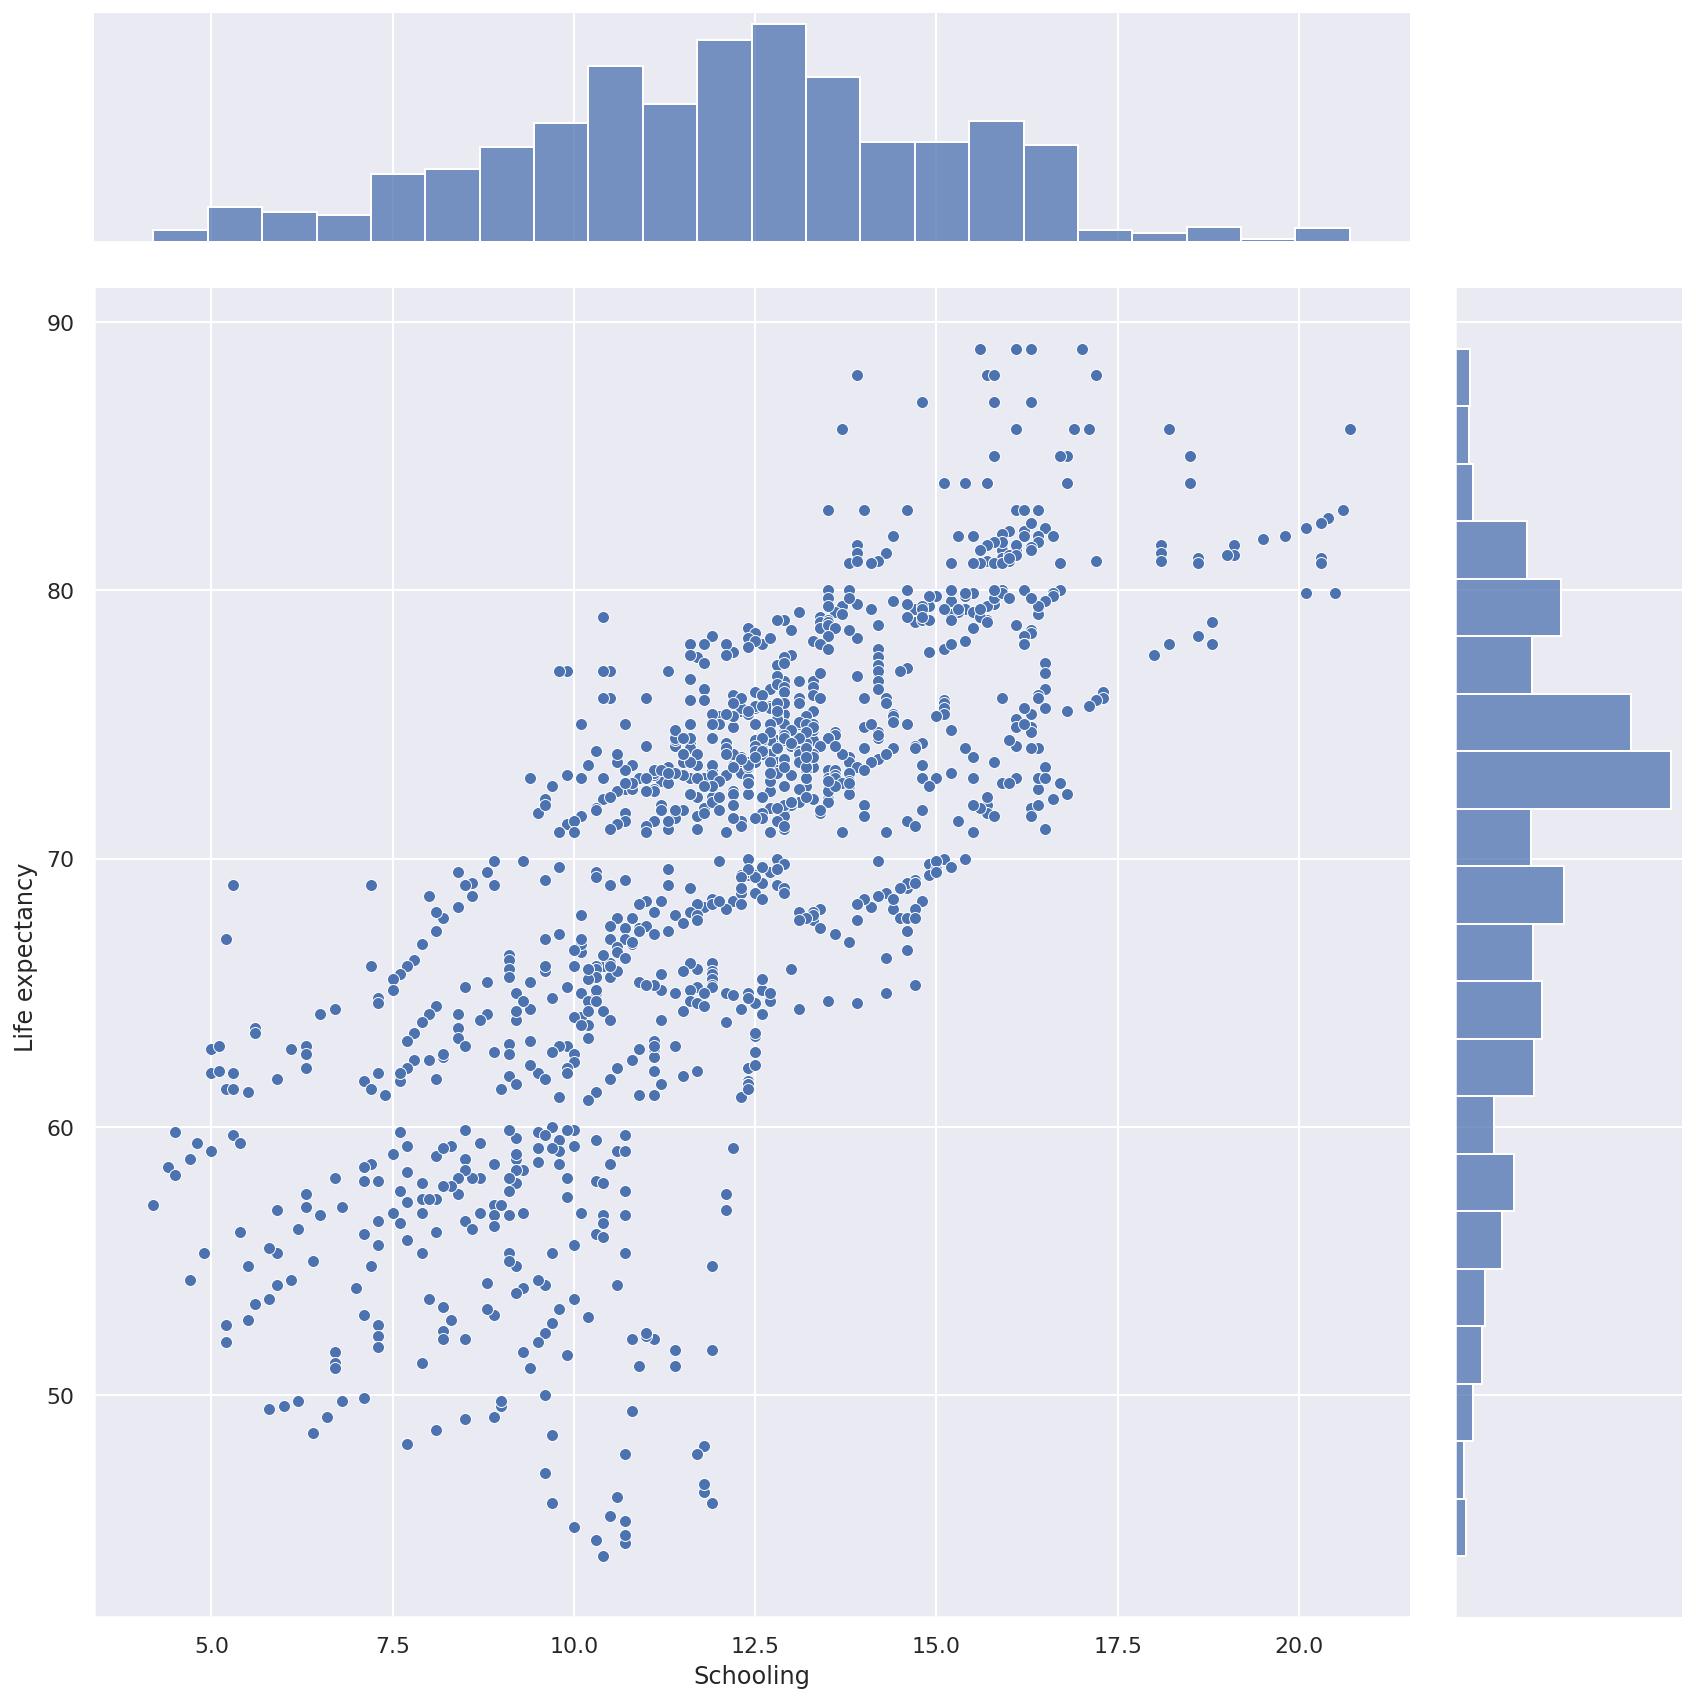

In [16]:
# Create a joint dataframe by concatenating the two variables
trainDFschooling = pd.concat([schooling_train, life_exp_train], axis = 1).reindex(schooling_train.index)

# Jointplot of Total Train against Schooling Train
sb.jointplot(data = trainDFschooling, x = "Schooling", y = "Life expectancy ", height = 12)

In [17]:
# Import LinearRegression model from Scikit-Learn
from sklearn.linear_model import LinearRegression

# Create a Linear Regression object
linreg = LinearRegression()

In [18]:
# Train the Linear Regression model
linreg.fit(schooling_train, life_exp_train)

LinearRegression()

In [19]:
# Coefficients of the Linear Regression line
print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

Intercept 	: b =  [42.70366372]
Coefficients 	: a =  [[2.23653096]]


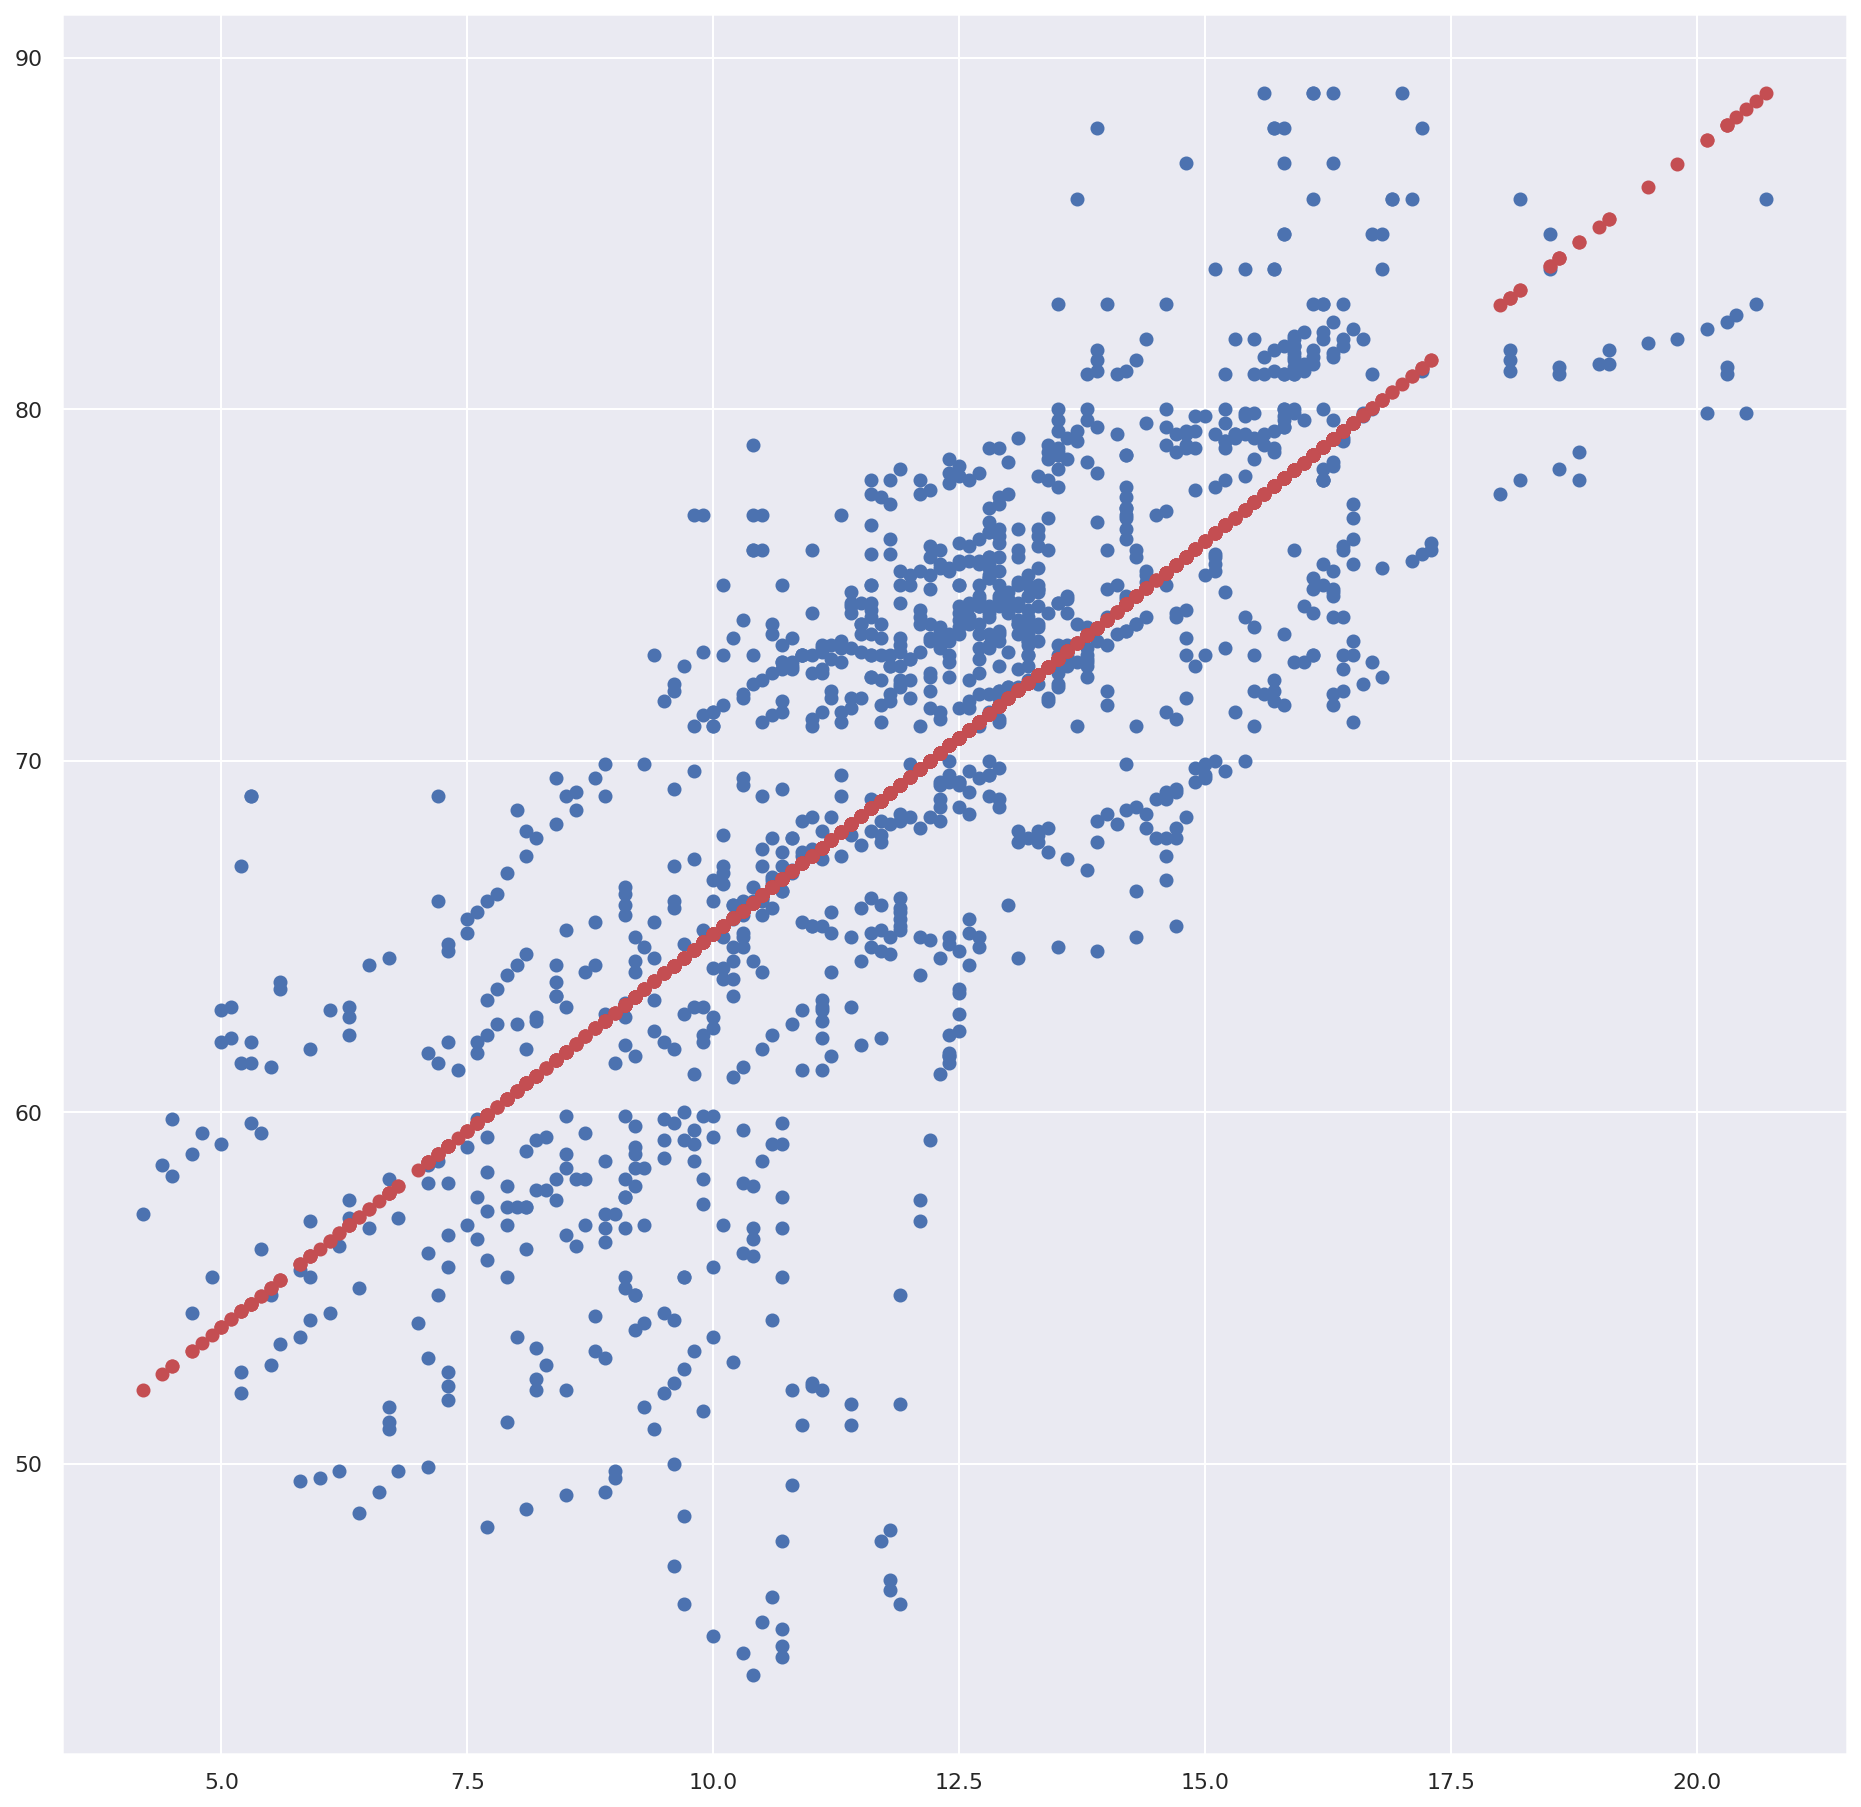

In [20]:
# Predict Total values corresponding to Schooling Train
life_exp_train_pred = linreg.predict(schooling_train)

# Plot the Linear Regression line
f = plt.figure(figsize=(16, 16))
plt.scatter(schooling_train, life_exp_train)
plt.scatter(schooling_train, life_exp_train_pred, color = "r")
plt.show()

In [21]:
# Explained Variance (R^2)
print("Explained Variance (R^2) \t:", linreg.score(schooling_train, life_exp_train))

# Mean Squared Error (MSE)
def mean_sq_err(actual, predicted):
    '''Returns the Mean Squared Error of actual and predicted values'''
    return np.mean(np.square(np.array(actual) - np.array(predicted)))


mse = mean_sq_err(life_exp_train, life_exp_train_pred)
print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))

Explained Variance (R^2) 	: 0.5678054832718609
Mean Squared Error (MSE) 	: 34.27461814973381
Root Mean Squared Error (RMSE) 	: 5.854452848023786


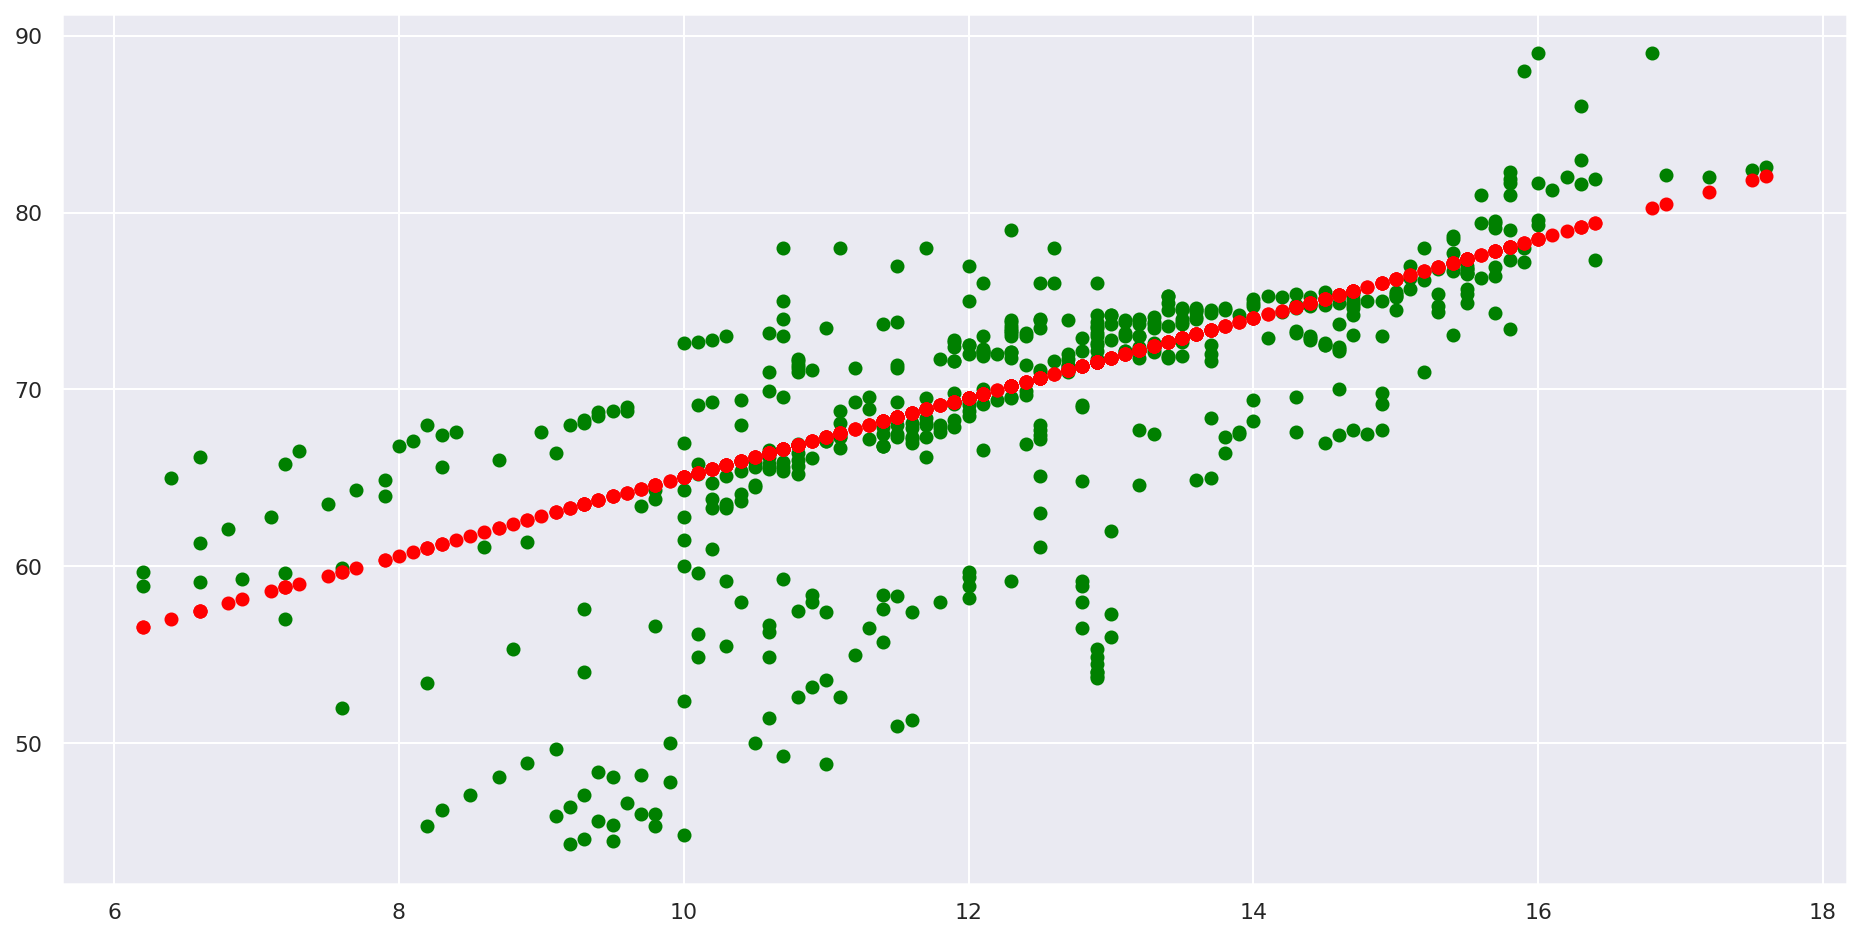

In [22]:
# Predict Total values corresponding to Schooling Test
life_exp_test_pred = linreg.predict(schooling_test)

# Plot the Predictions
f = plt.figure(figsize=(16, 8))
plt.scatter(schooling_test, life_exp_test, color = "green")
plt.scatter(schooling_test, life_exp_test_pred, color = "red")
plt.show()

In [23]:
# Explained Variance (R^2)
print("Explained Variance (R^2) \t:", linreg.score(schooling_test, life_exp_test))

# Mean Squared Error (MSE)
def mean_sq_err(actual, predicted):
    '''Returns the Mean Squared Error of actual and predicted values'''
    return np.mean(np.square(np.array(actual) - np.array(predicted)))

mse = mean_sq_err(life_exp_test, life_exp_test_pred)
print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))

Explained Variance (R^2) 	: 0.4094494805860198
Mean Squared Error (MSE) 	: 42.259475485065266
Root Mean Squared Error (RMSE) 	: 6.500728842604133


**Linear Regression for Income Composition of Resources with respect to LE**


In [24]:
# Train Set : 1154 samples
incomecomp_train = pd.DataFrame(incomecomp[:1154])
life_exp_train = pd.DataFrame(life_exp[:1154])

# Test Set : 495 samples
incomecomp_test = pd.DataFrame(incomecomp[-495:])
life_exp_test = pd.DataFrame(life_exp[-495:])

# Check the sample sizes
print("Train Set :", incomecomp_train.shape, life_exp_train.shape)
print("Test Set  :", incomecomp_test.shape, life_exp_test.shape)

Train Set : (1154, 1) (1154, 1)
Test Set  : (495, 1) (495, 1)


In [25]:
# Summary Statistics for Income Composition of Resources Train
incomecomp_train.describe()

,Income composition of resources
count,1154.000000
mean,0.634711
std,0.188527
min,0.000000
25%,0.507000
50%,0.675000
75%,0.761000
max,0.936000


<AxesSubplot: >

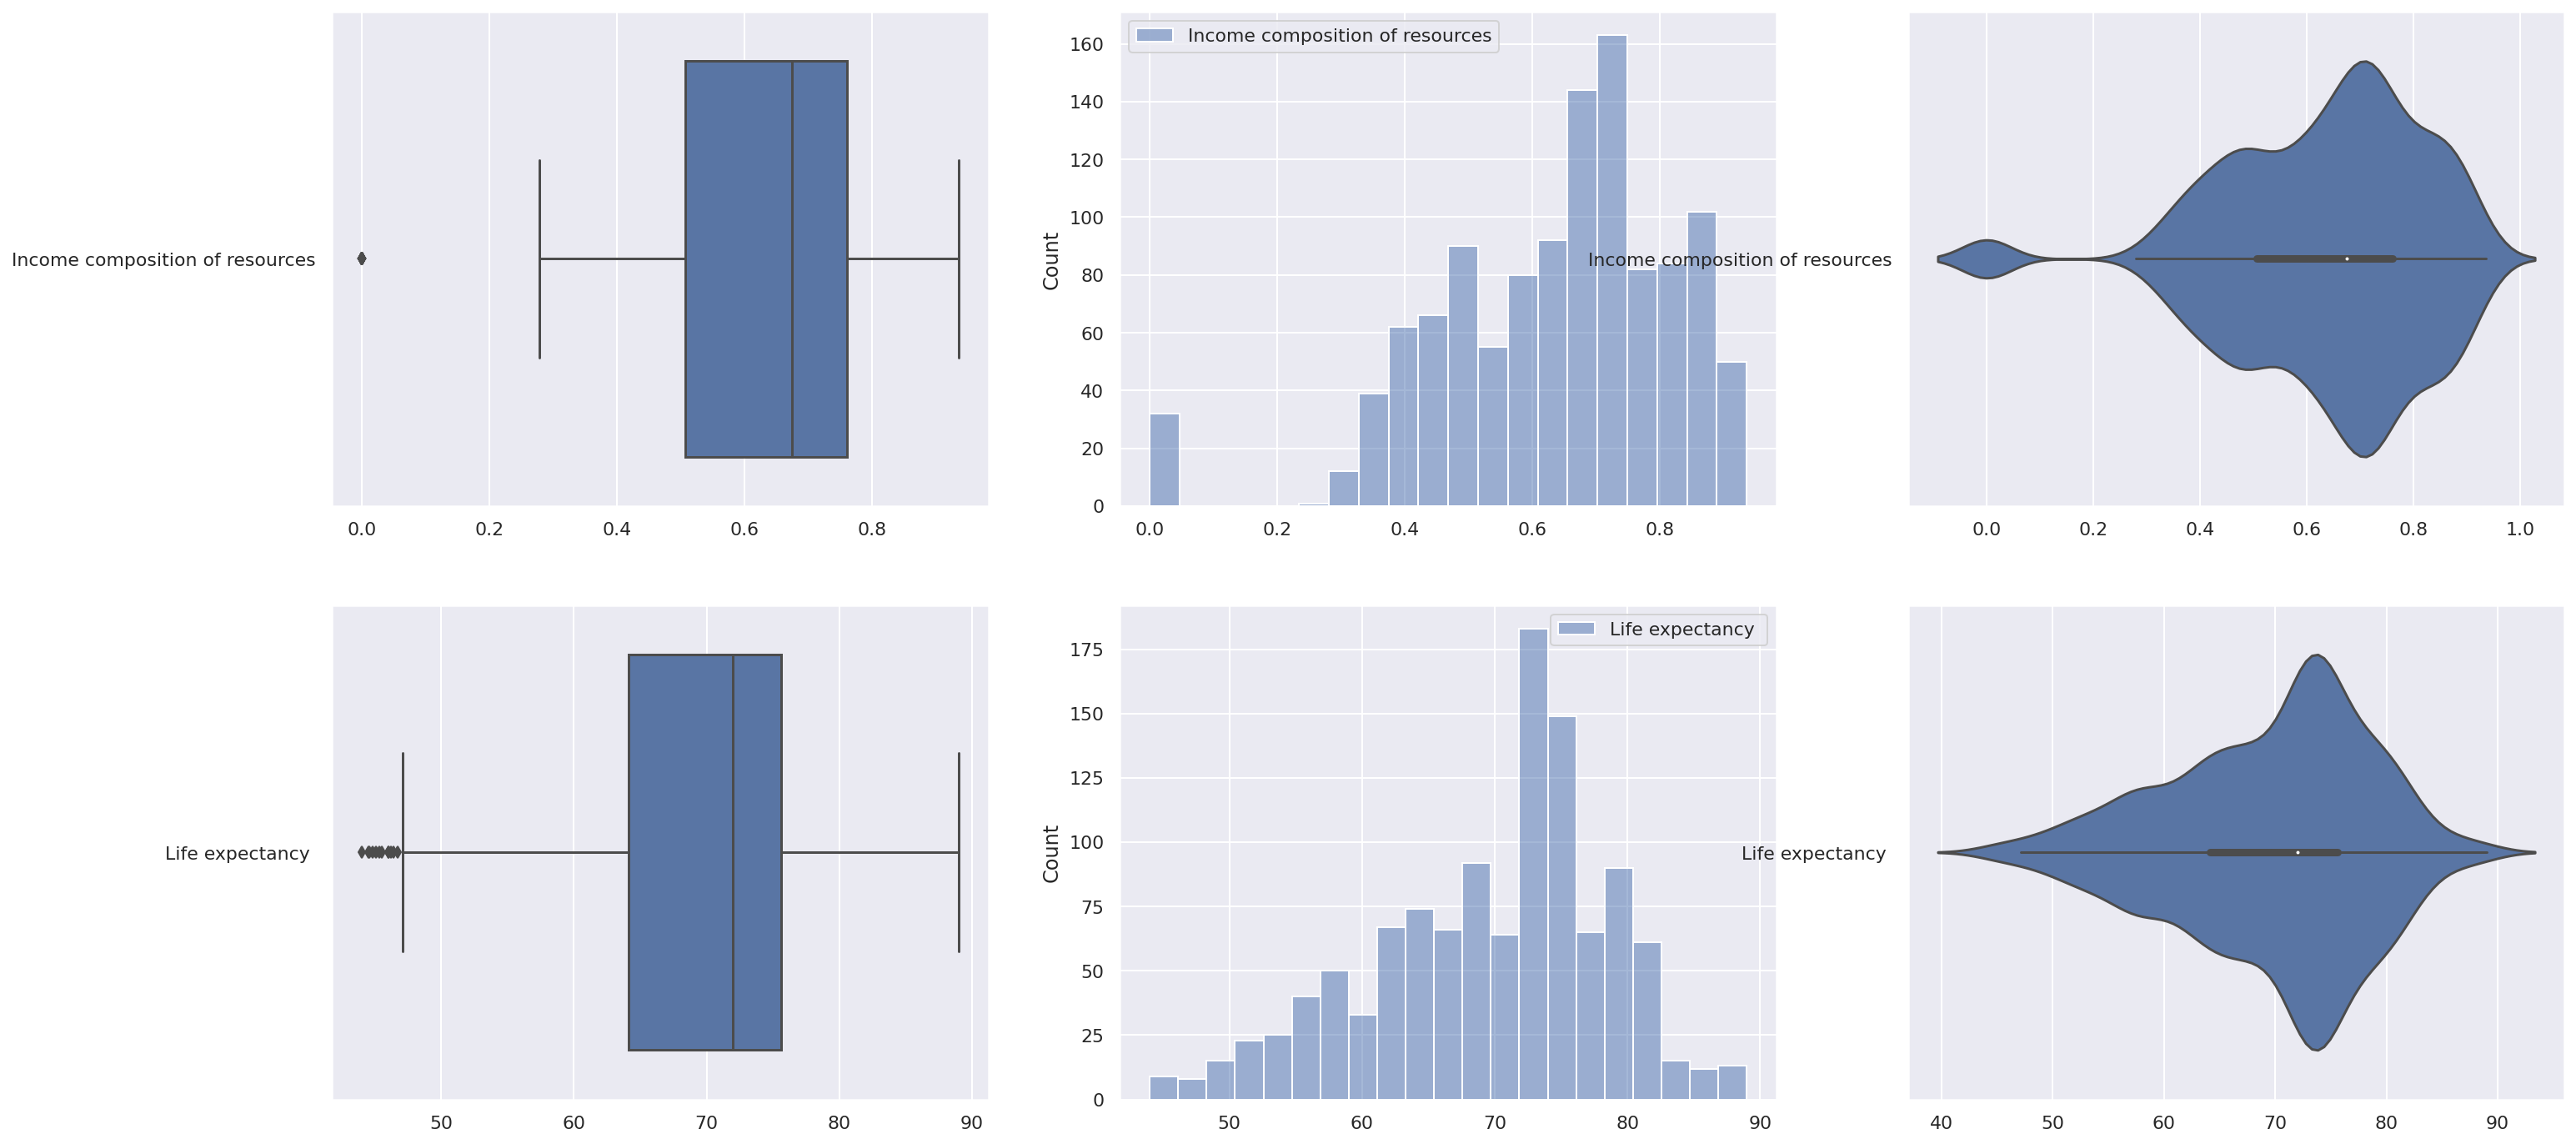

In [26]:
# Set up matplotlib figure with three subplots
f, axes = plt.subplots(2, 3, figsize=(24, 12))

# Plot the basic uni-variate figures for Income Composition of Resources Train
sb.boxplot(data = incomecomp_train, orient = "h", ax = axes[0,0])
sb.histplot(data = incomecomp_train, ax = axes[0,1])
sb.violinplot(data = incomecomp_train, orient = "h", ax = axes[0,2])

# Plot the basic uni-variate figures for LE Train
sb.boxplot(data = life_exp_train, orient = "h", ax = axes[1,0])
sb.histplot(data = life_exp_train, ax = axes[1,1])
sb.violinplot(data = life_exp_train, orient = "h", ax = axes[1,2])

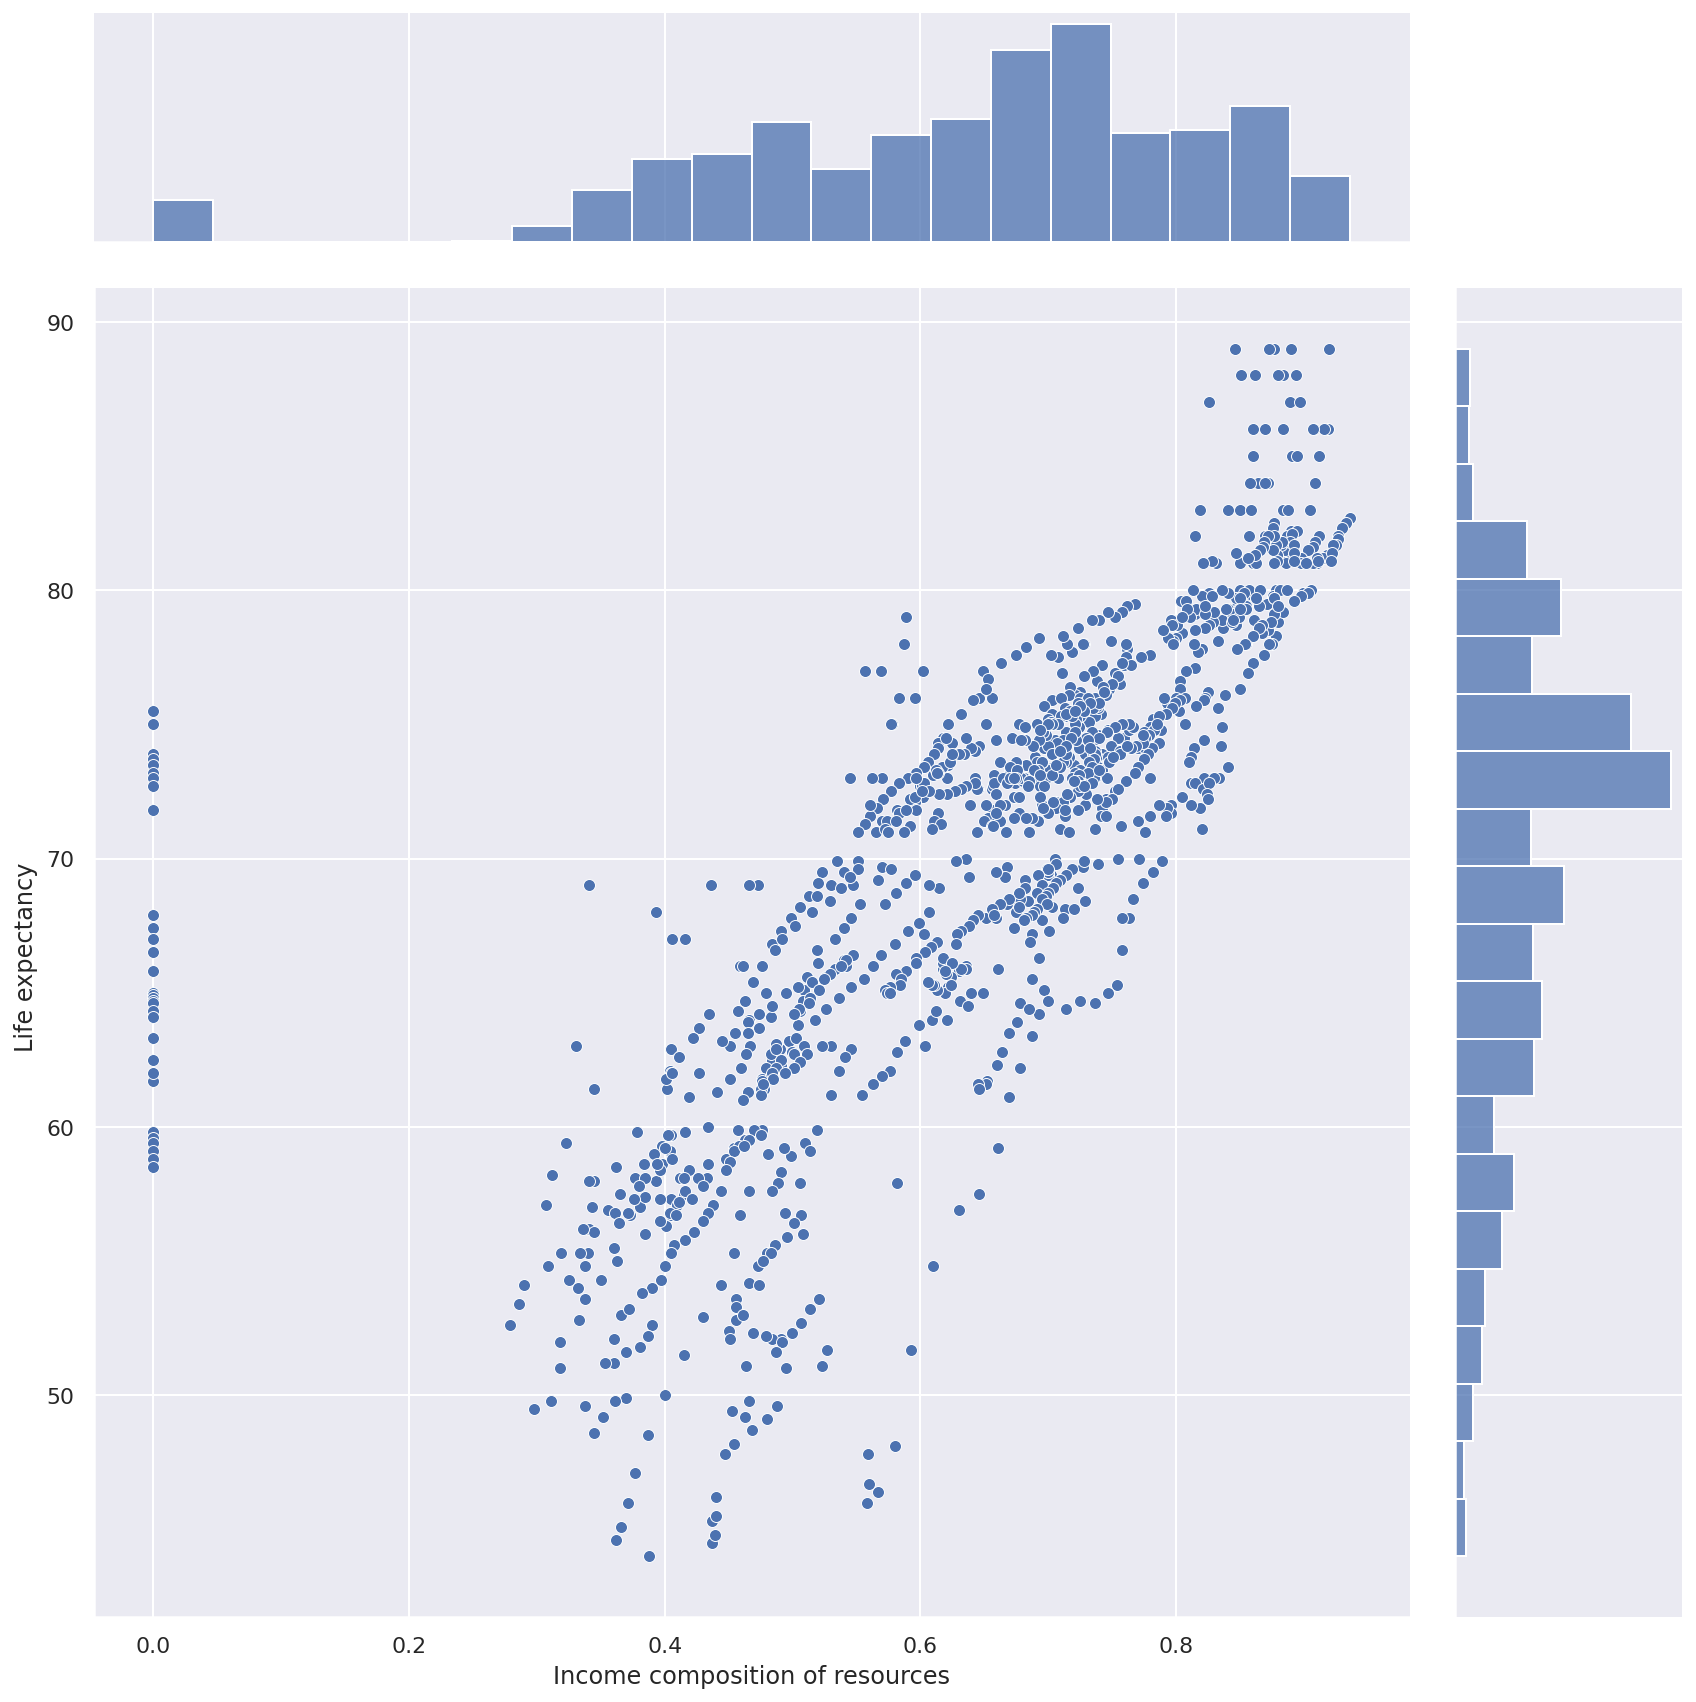

In [27]:
# Create a joint dataframe by concatenating the two variables
trainDFincomecomp = pd.concat([incomecomp_train, life_exp_train], axis = 1).reindex(incomecomp_train.index)

# Jointplot of Total Train against Income Composition of Resources Train
sb.jointplot(data = trainDFincomecomp, x = "Income composition of resources", y = "Life expectancy ", height = 12)

In [28]:
# Train the Linear Regression model
linreg.fit(incomecomp_train, life_exp_train)

LinearRegression()

In [29]:
# Coefficients of the Linear Regression line
print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

Intercept 	: b =  [47.07928737]
Coefficients 	: a =  [[35.63049076]]


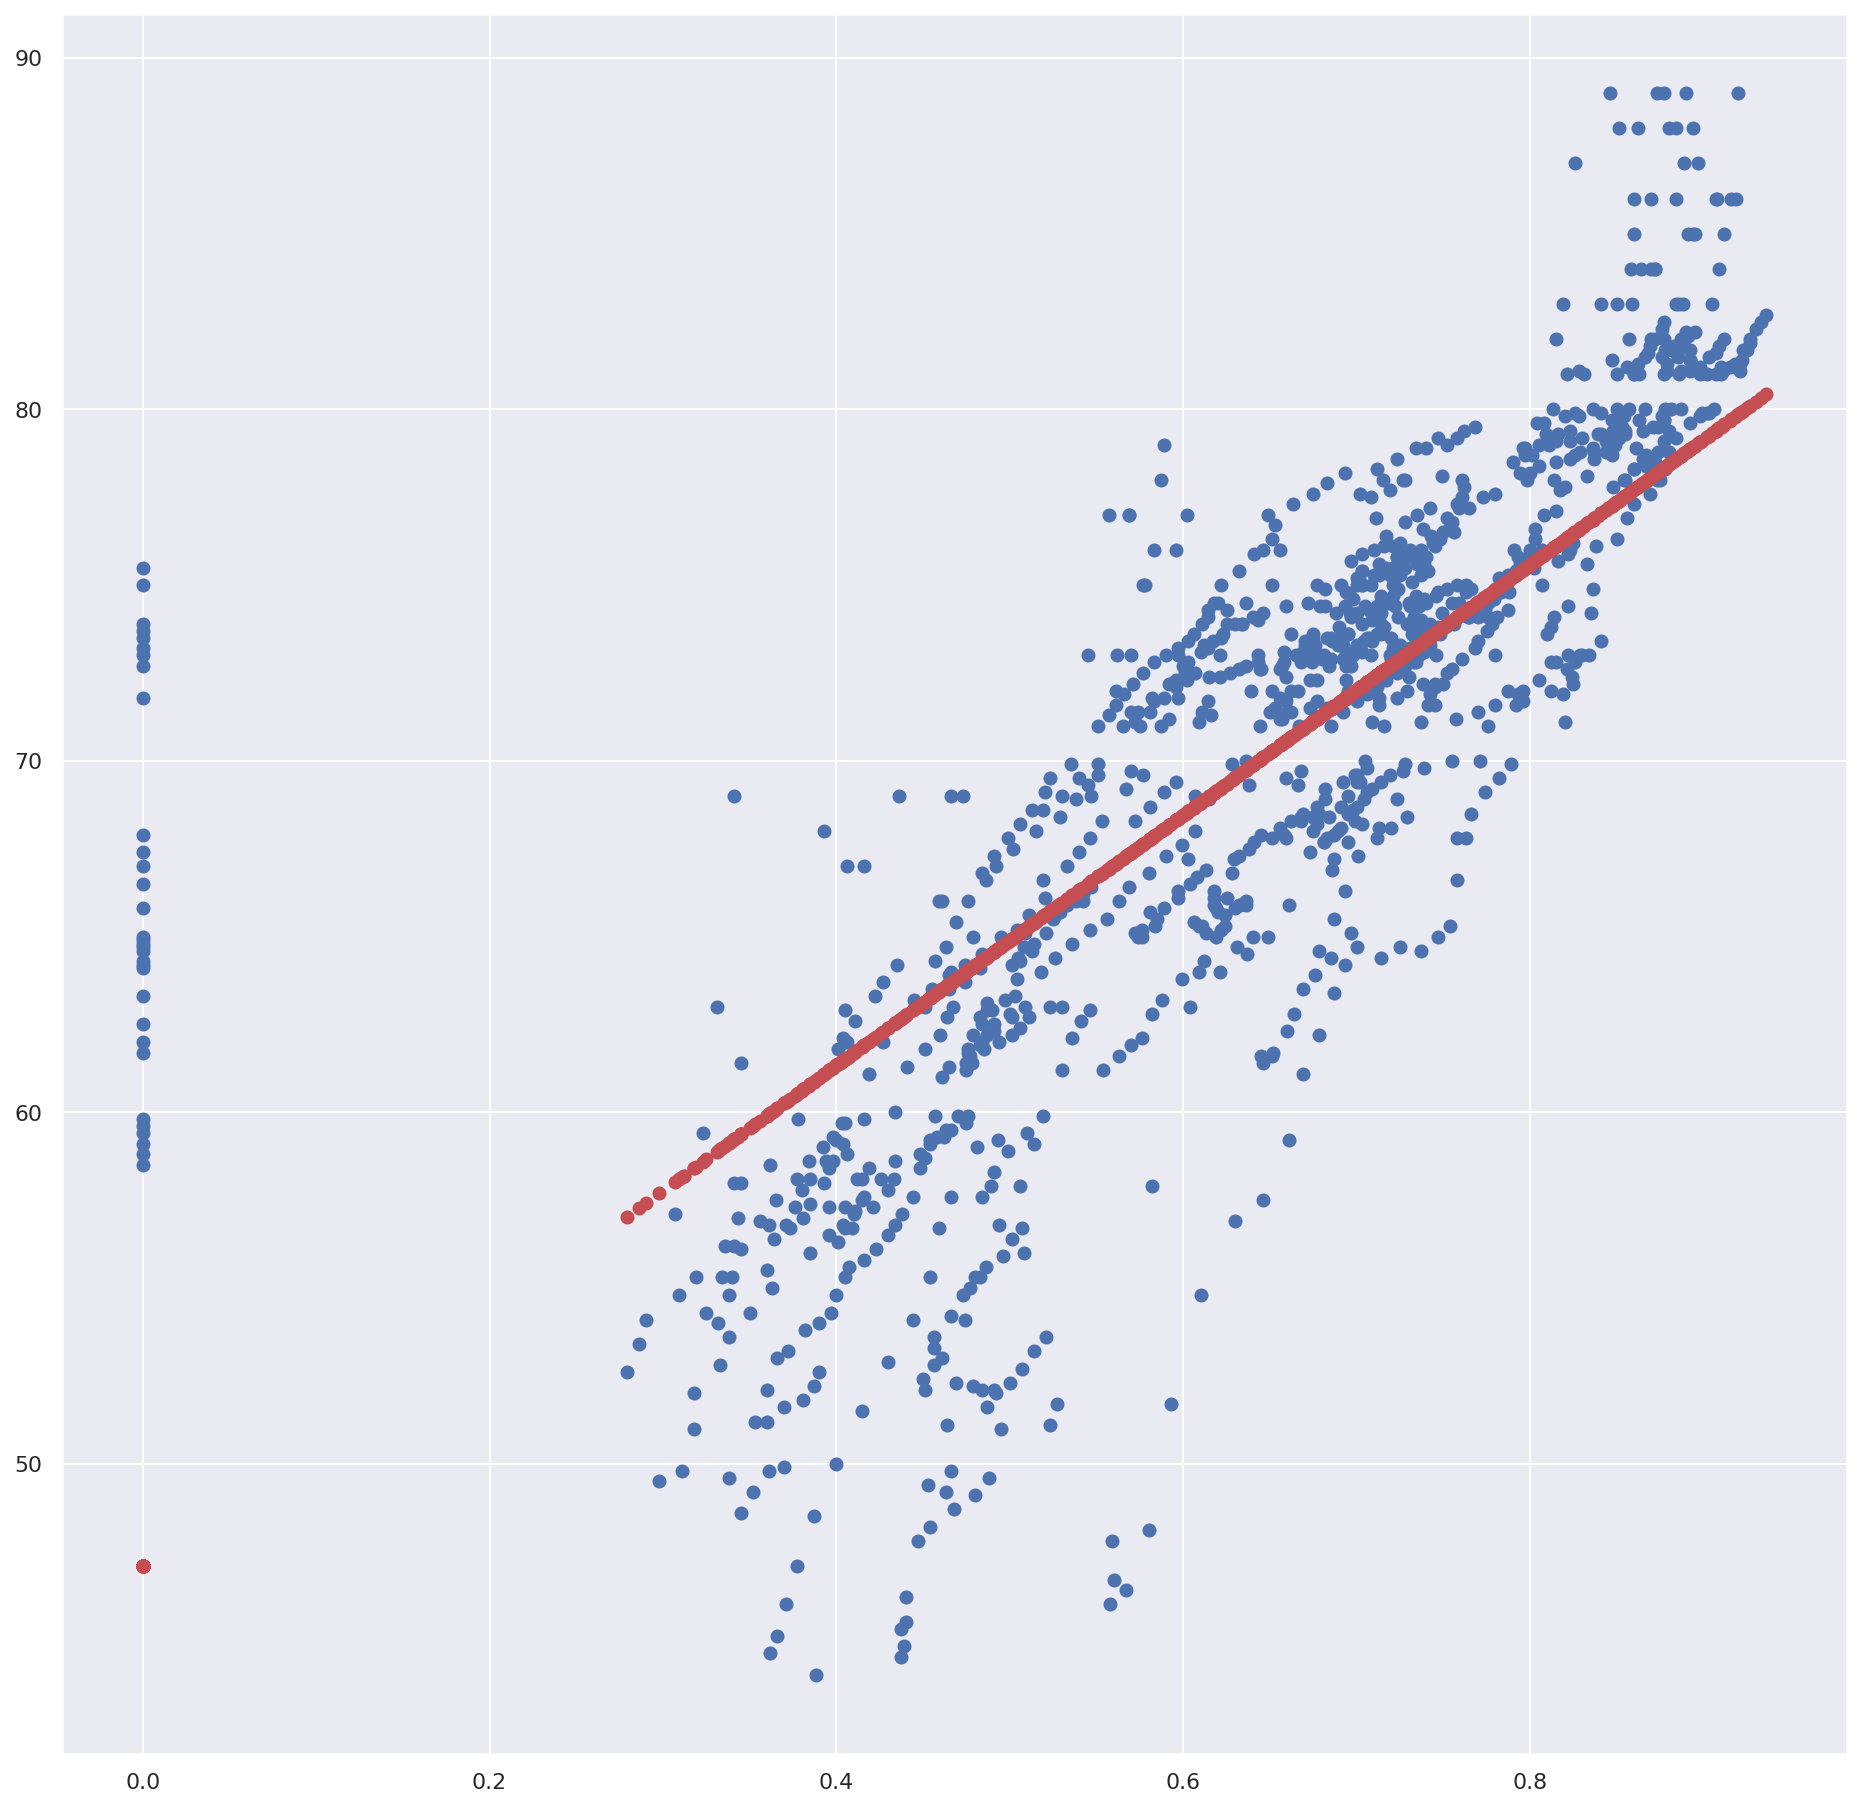

In [30]:
# Predict Total values corresponding to Income Composition of Resources Train
life_exp_train_pred = linreg.predict(incomecomp_train)

# Plot the Linear Regression line
f = plt.figure(figsize=(16, 16))
plt.scatter(incomecomp_train, life_exp_train)
plt.scatter(incomecomp_train, life_exp_train_pred, color = "r")
plt.show()

In [31]:
# Explained Variance (R^2)
print("Explained Variance (R^2) \t:", linreg.score(incomecomp_train, life_exp_train))

# Mean Squared Error (MSE)
def mean_sq_err(actual, predicted):
    '''Returns the Mean Squared Error of actual and predicted values'''
    return np.mean(np.square(np.array(actual) - np.array(predicted)))


mse = mean_sq_err(life_exp_train, life_exp_train_pred)
print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))

Explained Variance (R^2) 	: 0.5684895065824519
Mean Squared Error (MSE) 	: 34.220372580045634
Root Mean Squared Error (RMSE) 	: 5.849818166408733


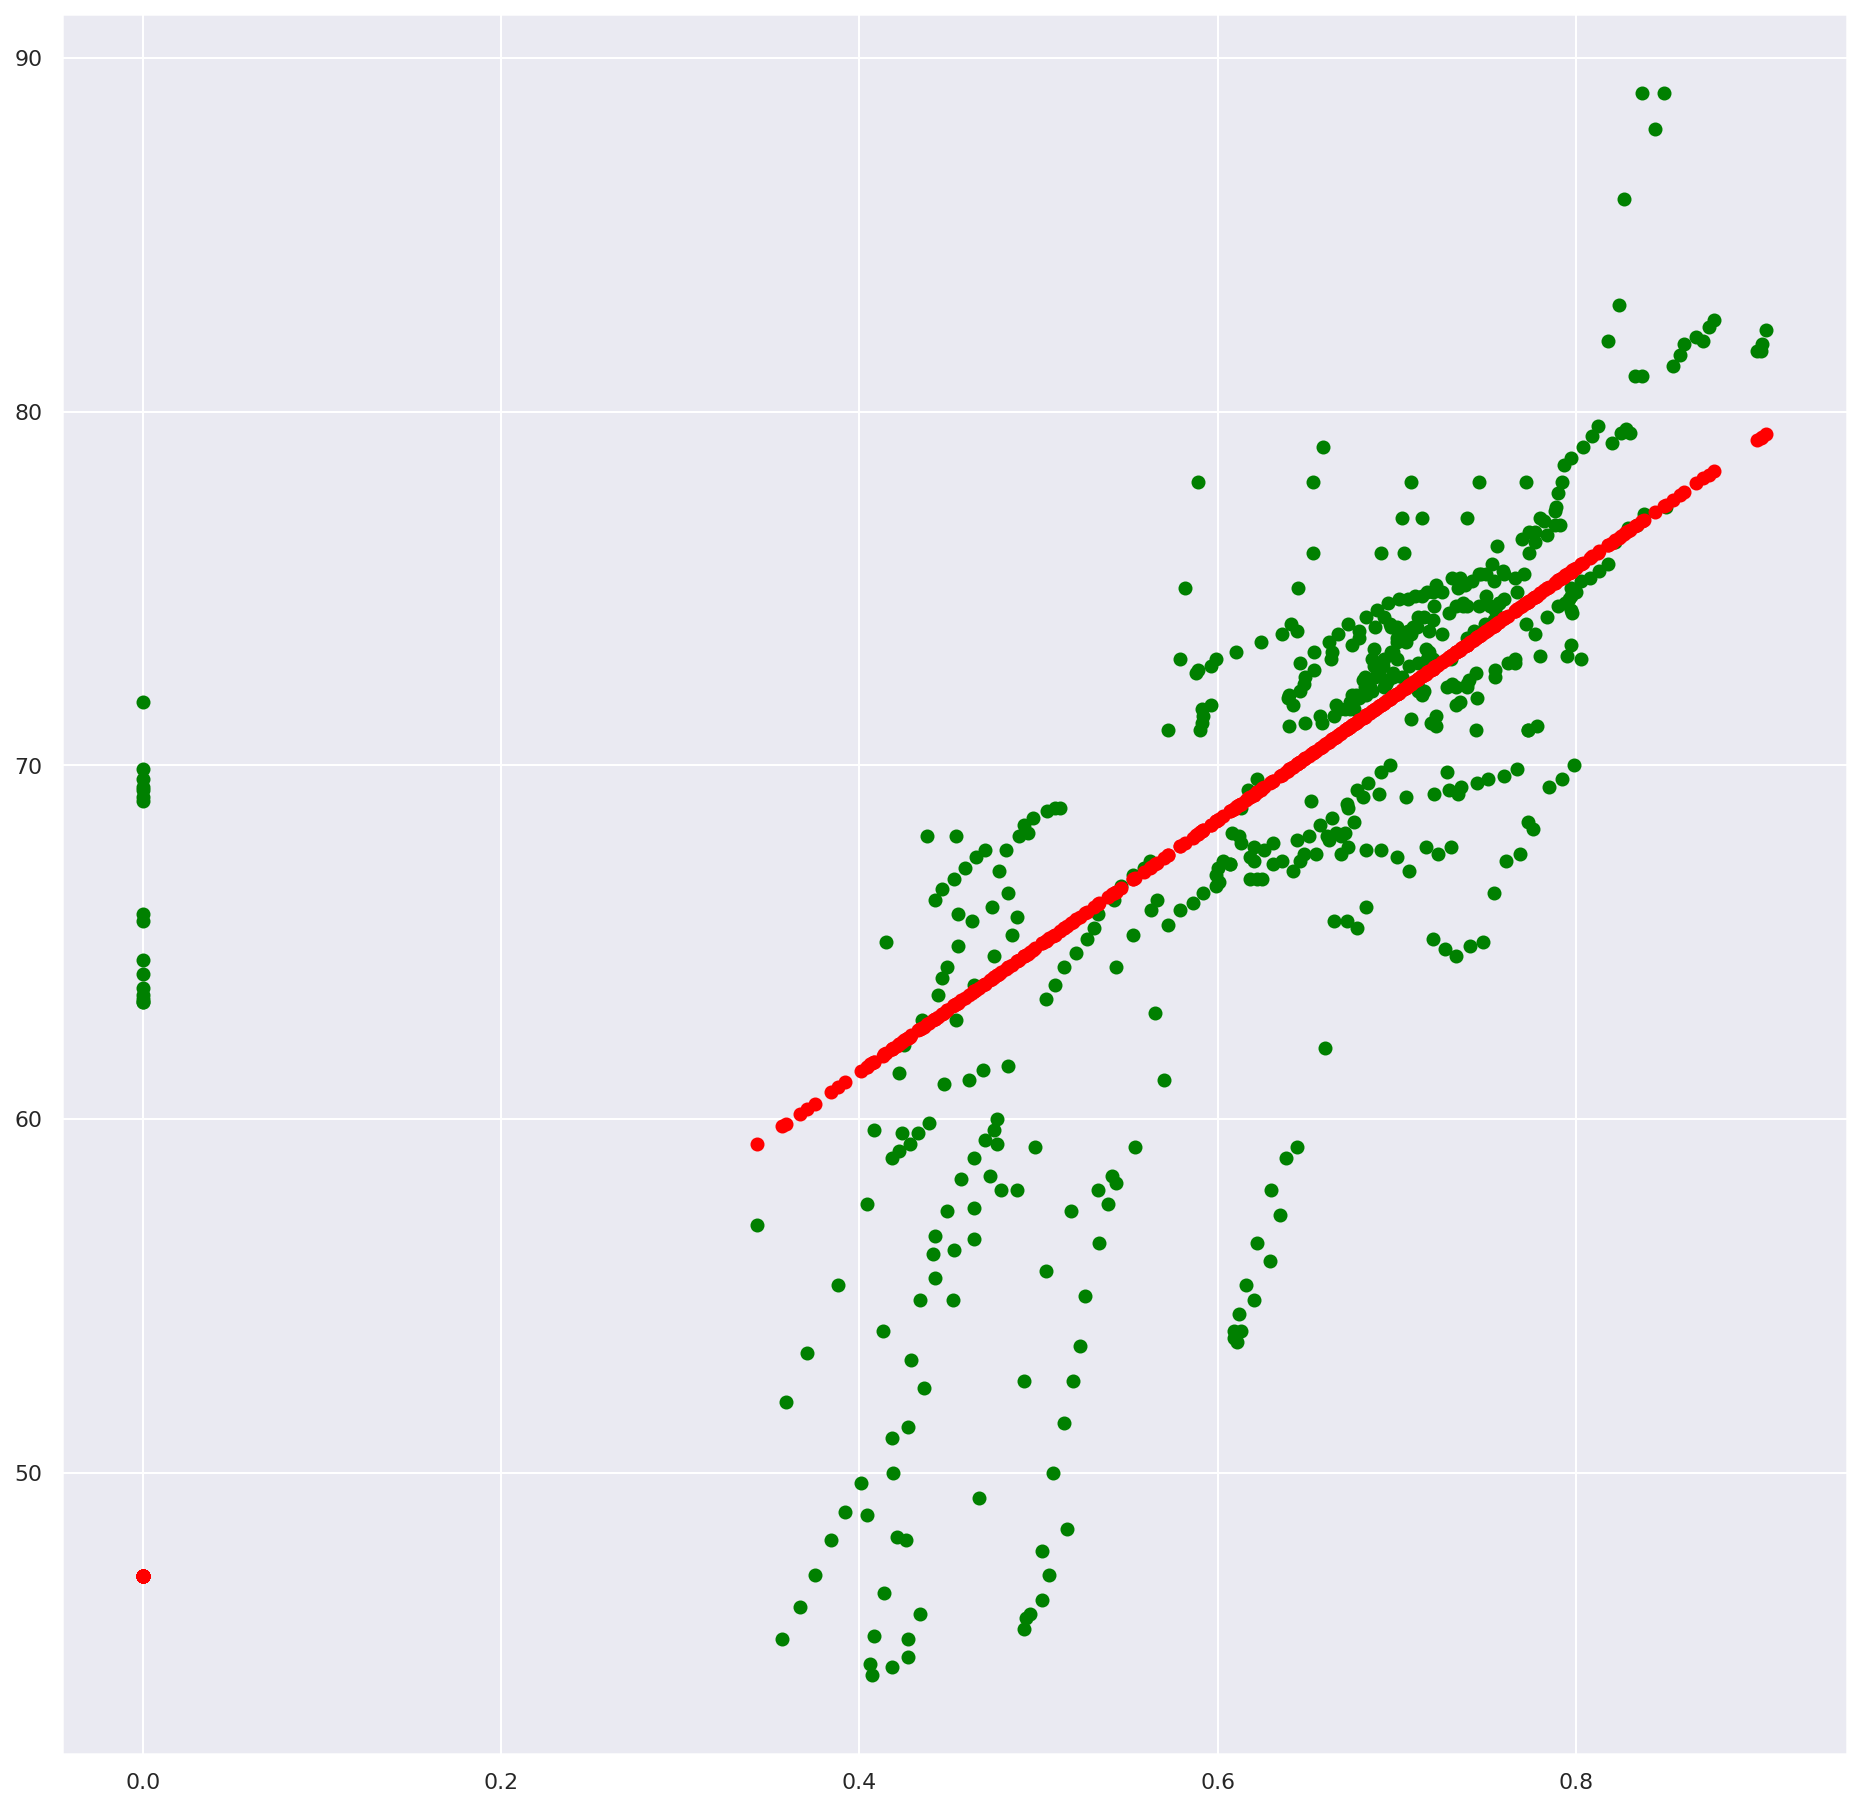

In [32]:
# Predict LE values corresponding to Life Expectancy Test
life_exp_test_pred = linreg.predict(incomecomp_test)

# Plot the Predictions
f = plt.figure(figsize=(16, 16))
plt.scatter(incomecomp_test, life_exp_test, color = "green")
plt.scatter(incomecomp_test, life_exp_test_pred, color = "red")
plt.show()

In [33]:
# Explained Variance (R^2)
print("Explained Variance (R^2) \t:", linreg.score(incomecomp_test, life_exp_test))

# Mean Squared Error (MSE)
def mean_sq_err(actual, predicted):
    '''Returns the Mean Squared Error of actual and predicted values'''
    return np.mean(np.square(np.array(actual) - np.array(predicted)))

mse = mean_sq_err(life_exp_test, life_exp_test_pred)
print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))

Explained Variance (R^2) 	: 0.3814226287154522
Mean Squared Error (MSE) 	: 44.26506183307682
Root Mean Squared Error (RMSE) 	: 6.653199368204505


**Linear Regression for Adult Mortality with respect to LE**


In [34]:
# Train Set : 1154 samples
a_mortality_train = pd.DataFrame(a_mortality[:1154])
life_exp_train = pd.DataFrame(life_exp[:1154])

# Test Set : 495 samples
a_mortality_test = pd.DataFrame(a_mortality[-495:])
life_exp_test = pd.DataFrame(life_exp[-495:])

# Check the sample sizes
print("Train Set :", a_mortality_train.shape, life_exp_train.shape)
print("Test Set  :", a_mortality_test.shape, life_exp_test.shape)

Train Set : (1154, 1) (1154, 1)
Test Set  : (495, 1) (495, 1)


In [35]:
# Summary Statistics for Adult Mortality Train
a_mortality_train.describe()

,Adult Mortality
count,1154.000000
mean,161.480069
std,121.332241
min,1.000000
25%,73.000000
50%,141.000000
75%,231.000000
max,699.000000


<AxesSubplot: >

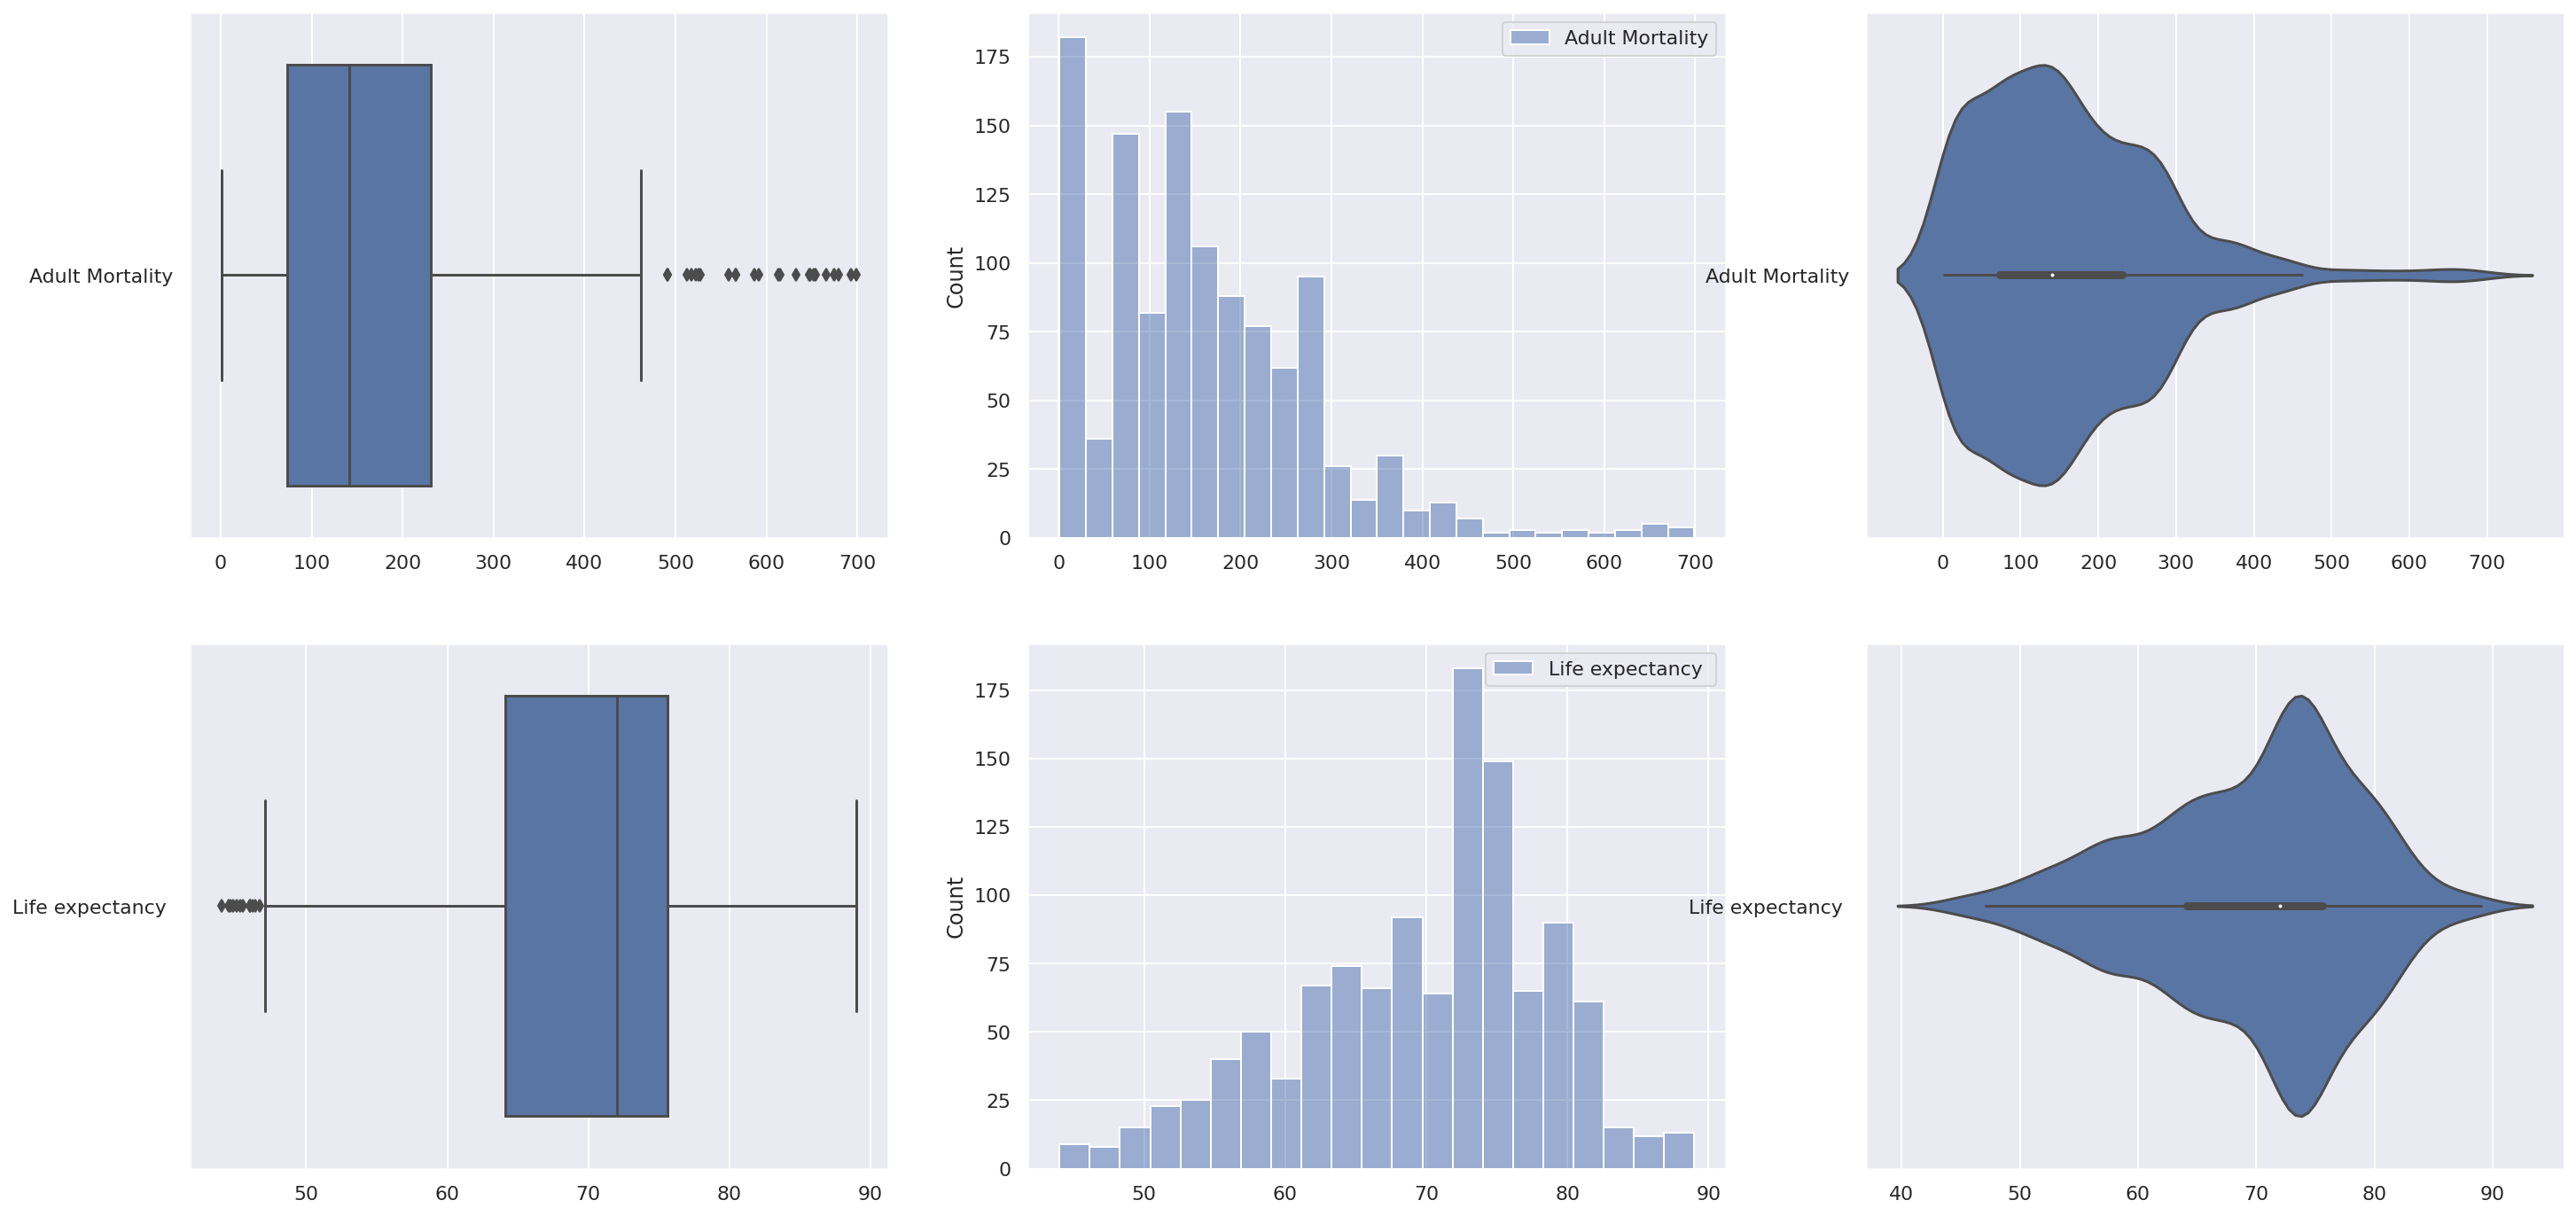

In [36]:
# Set up matplotlib figure with three subplots
f, axes = plt.subplots(2, 3, figsize=(24, 12))

# Plot the basic uni-variate figures for Adult Mortality Train
sb.boxplot(data = a_mortality_train, orient = "h", ax = axes[0,0])
sb.histplot(data = a_mortality_train, ax = axes[0,1])
sb.violinplot(data = a_mortality_train, orient = "h", ax = axes[0,2])

# Plot the basic uni-variate figures for LE Train
sb.boxplot(data = life_exp_train, orient = "h", ax = axes[1,0])
sb.histplot(data = life_exp_train, ax = axes[1,1])
sb.violinplot(data = life_exp_train, orient = "h", ax = axes[1,2])

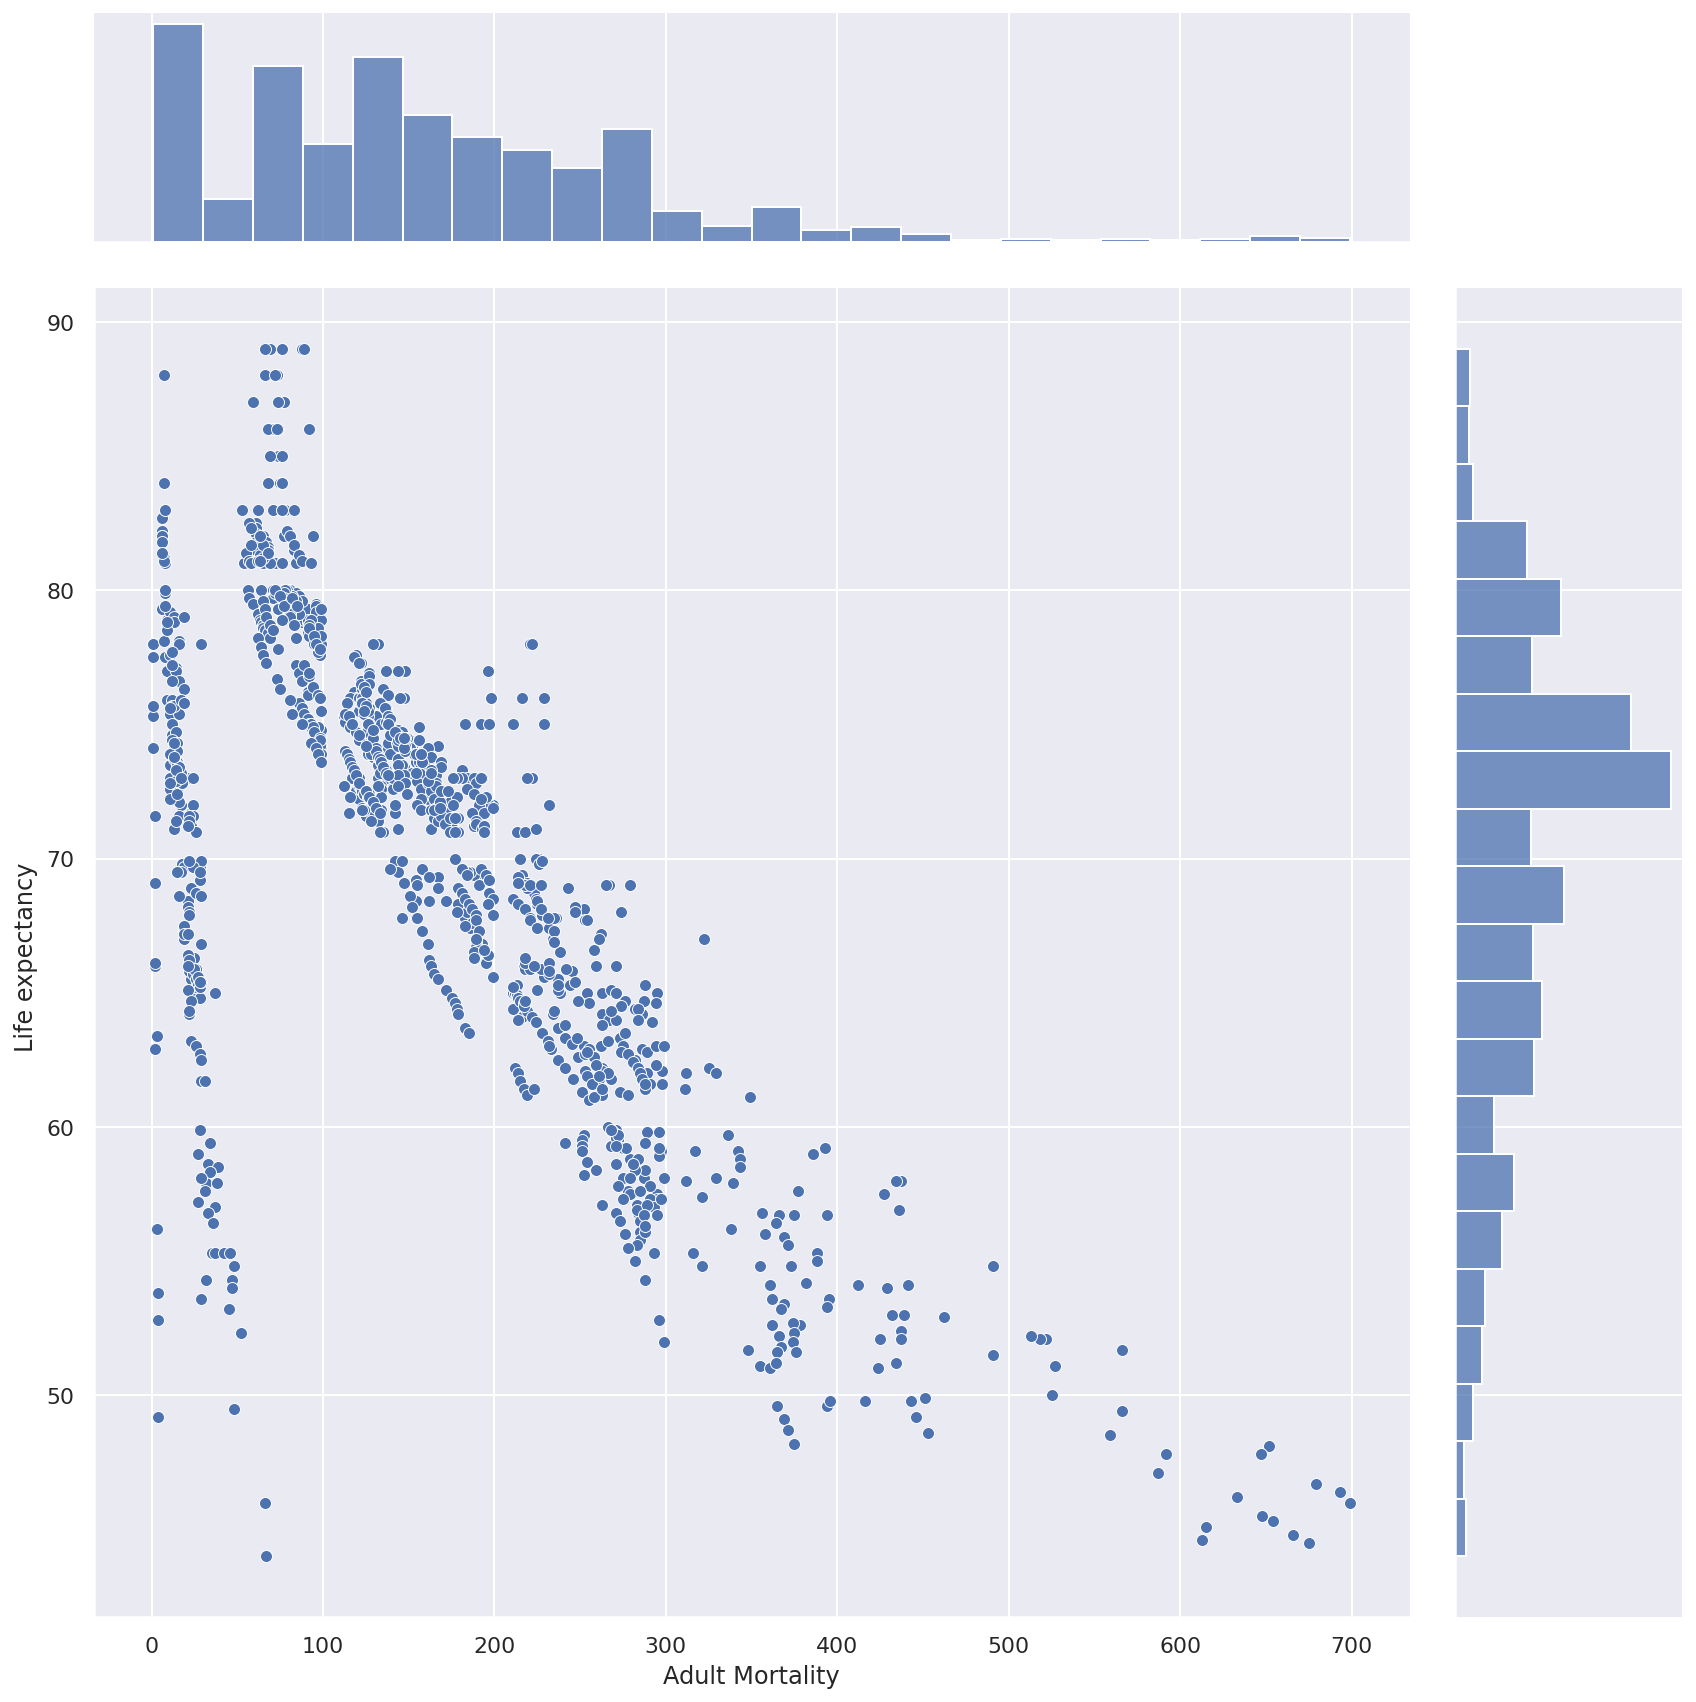

In [37]:
# Create a joint dataframe by concatenating the two variables
trainDFamortality = pd.concat([a_mortality_train, life_exp_train], axis = 1).reindex(a_mortality_train.index)

# Jointplot of LE Train against Adult Mortality Train
sb.jointplot(data = trainDFamortality, x = "Adult Mortality", y = "Life expectancy ", height = 12)

In [38]:
# Train the Linear Regression model
linreg.fit(a_mortality_train, life_exp_train)

LinearRegression()

In [39]:
# Coefficients of the Linear Regression line
print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

Intercept 	: b =  [78.23340527]
Coefficients 	: a =  [[-0.05287983]]


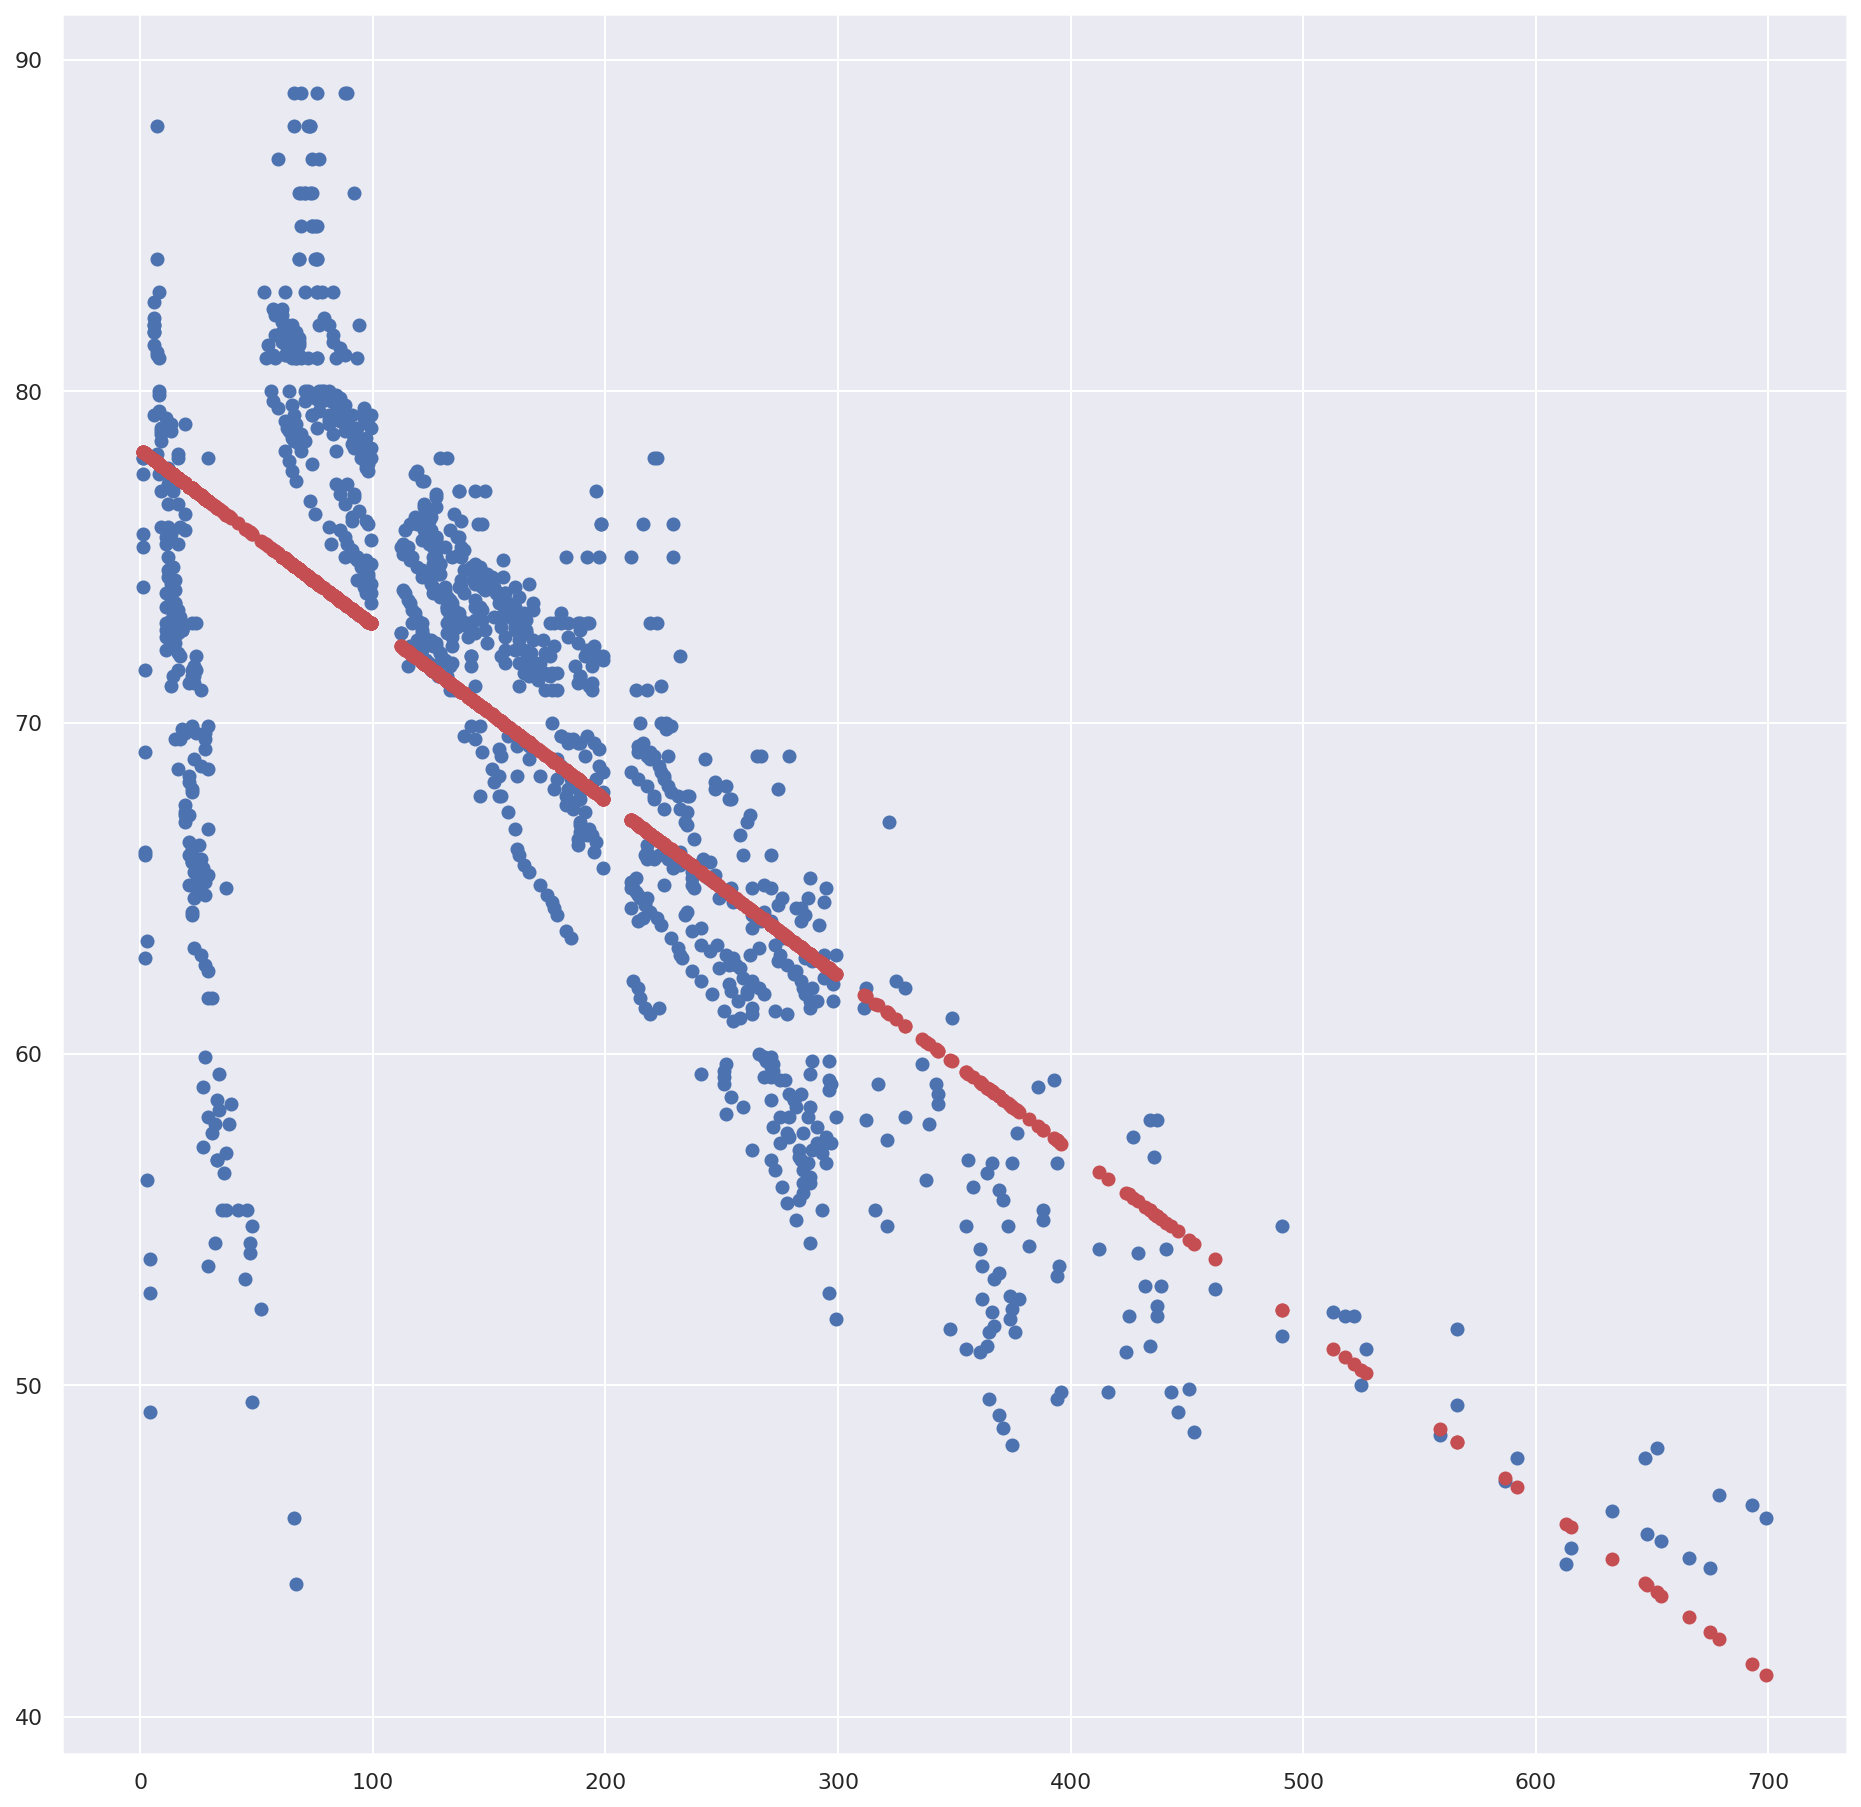

In [40]:
# Predict Total values corresponding to Adult Mortality Train
life_exp_train_pred = linreg.predict(a_mortality_train)

# Plot the Linear Regression line
f = plt.figure(figsize=(16, 16))
plt.scatter(a_mortality_train, life_exp_train)
plt.scatter(a_mortality_train, life_exp_train_pred, color = "r")
plt.show()

In [41]:
# Explained Variance (R^2)
print("Explained Variance (R^2) \t:", linreg.score(a_mortality_train, life_exp_train))

# Mean Squared Error (MSE)
def mean_sq_err(actual, predicted):
    '''Returns the Mean Squared Error of actual and predicted values'''
    return np.mean(np.square(np.array(actual) - np.array(predicted)))


mse = mean_sq_err(life_exp_train, life_exp_train_pred)
print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))

Explained Variance (R^2) 	: 0.5186359103610807
Mean Squared Error (MSE) 	: 38.17394650970594
Root Mean Squared Error (RMSE) 	: 6.178506818779594


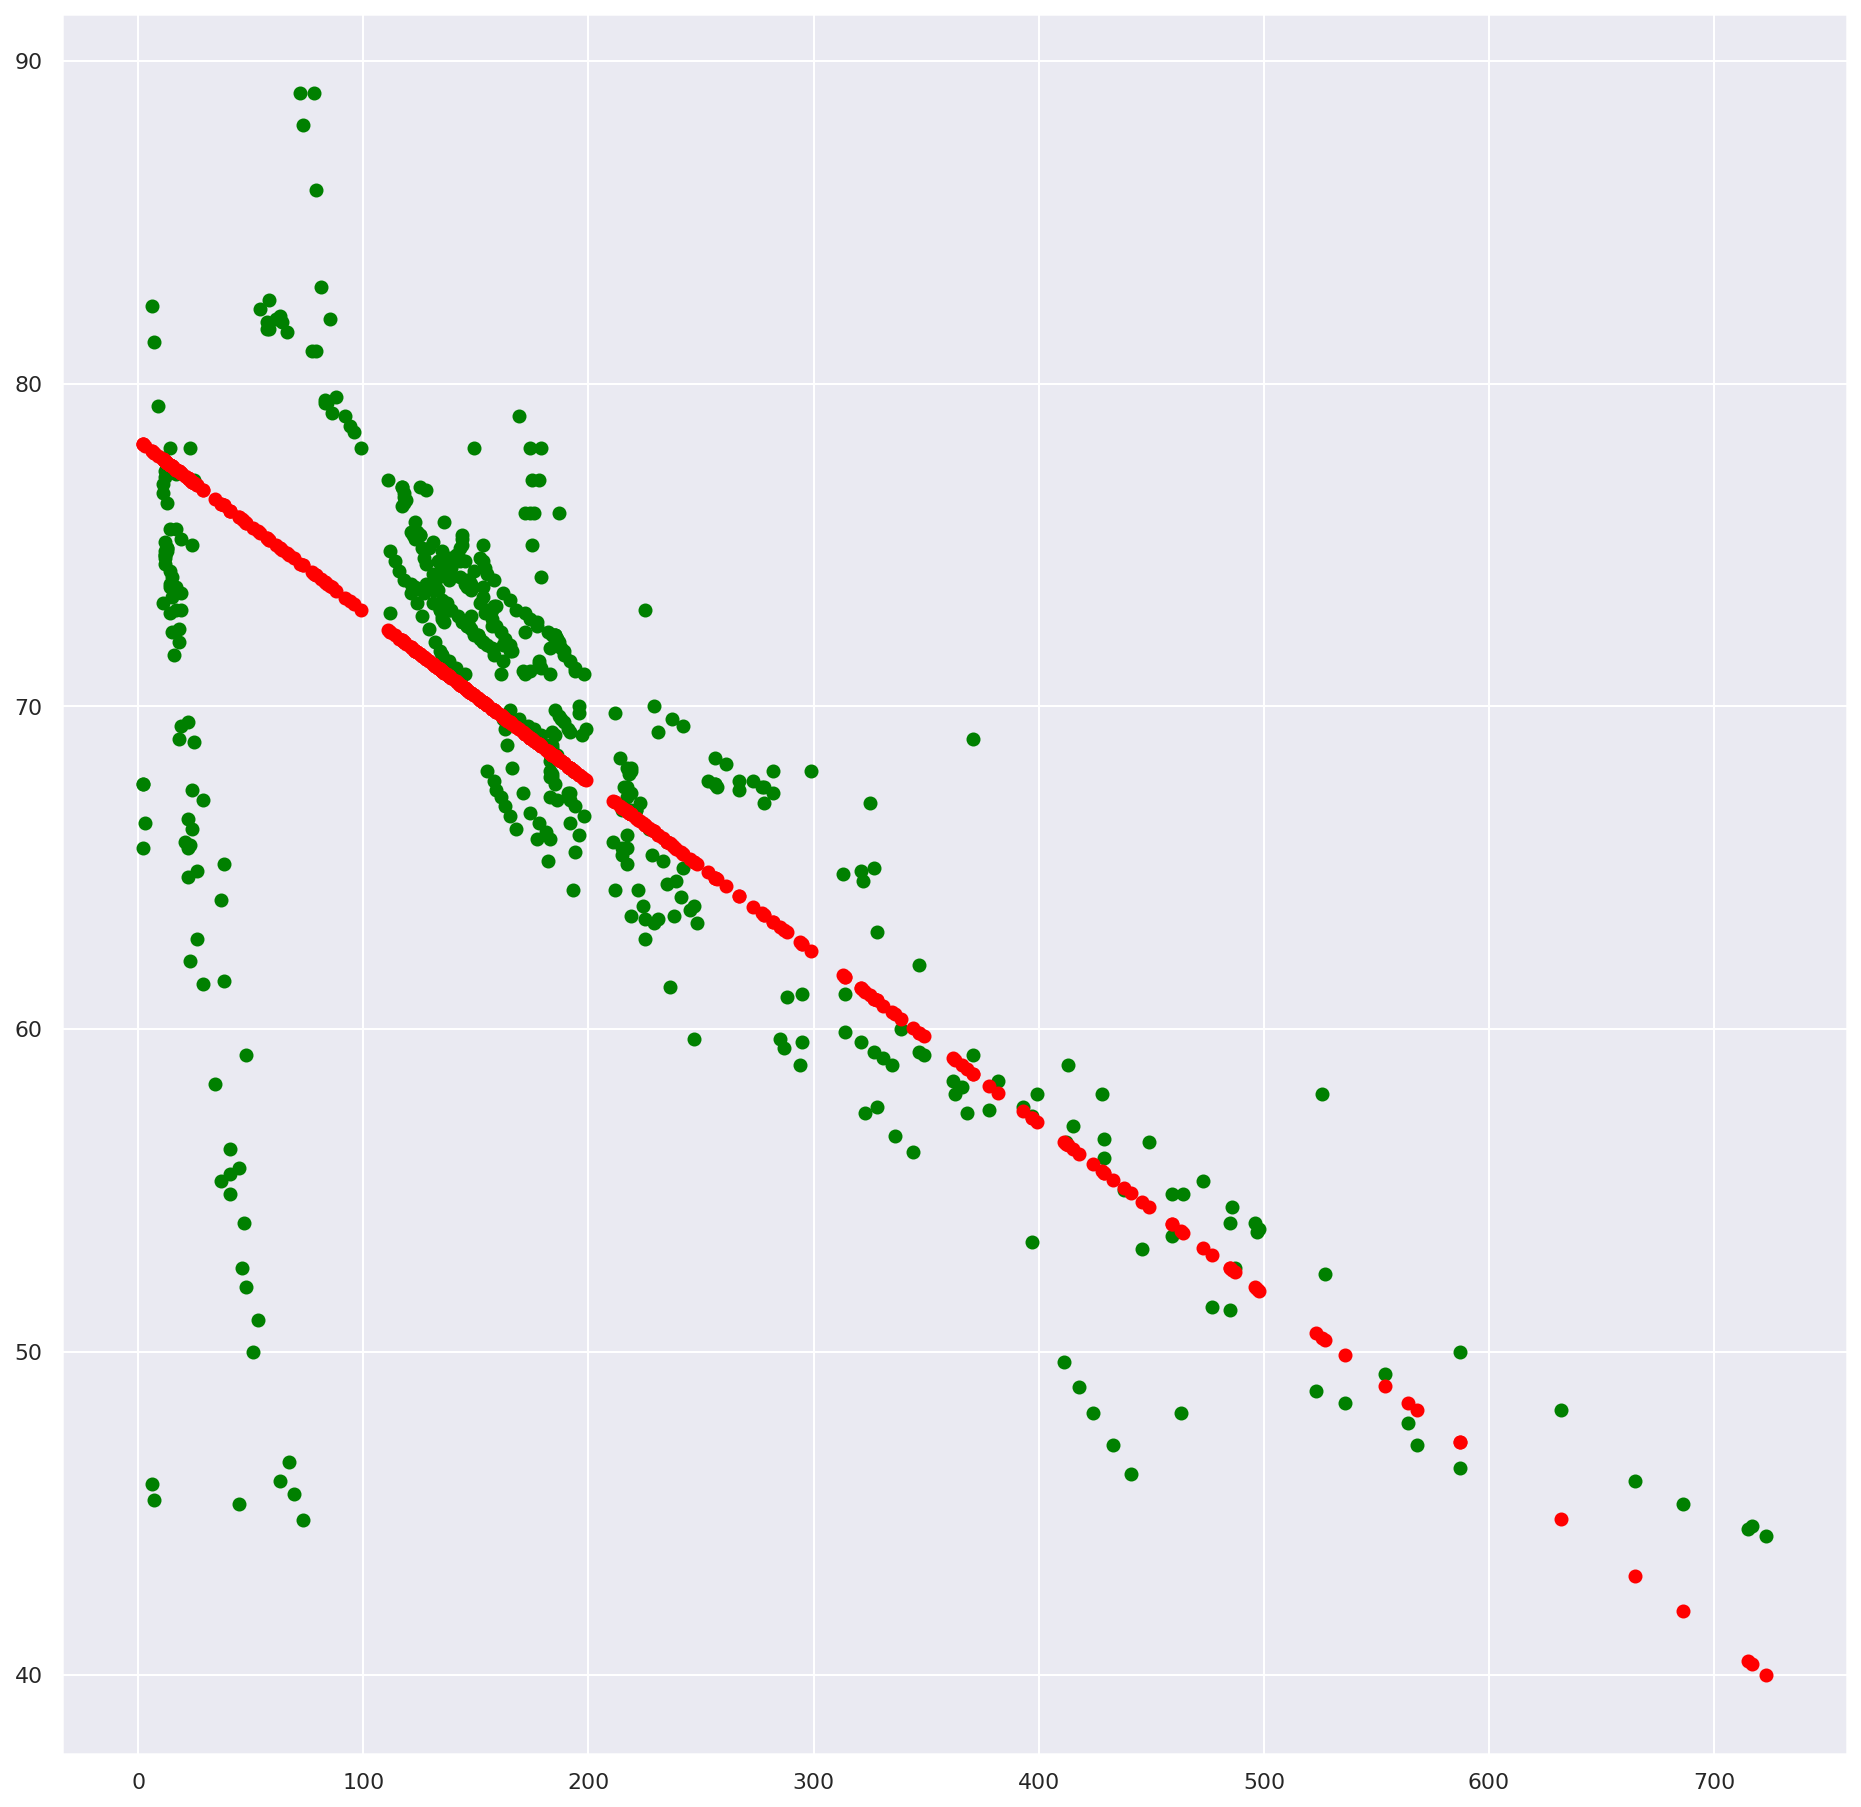

In [42]:
# Predict Total values corresponding to Life Expectancy Test
life_exp_test_pred = linreg.predict(a_mortality_test)

# Plot the Predictions
f = plt.figure(figsize=(16, 16))
plt.scatter(a_mortality_test, life_exp_test, color = "green")
plt.scatter(a_mortality_test, life_exp_test_pred, color = "red")
plt.show()

In [43]:
# Explained Variance (R^2)
print("Explained Variance (R^2) \t:", linreg.score(a_mortality_test, life_exp_test))

# Mean Squared Error (MSE)
def mean_sq_err(actual, predicted):
    '''Returns the Mean Squared Error of actual and predicted values'''
    return np.mean(np.square(np.array(actual) - np.array(predicted)))

mse = mean_sq_err(life_exp_test, life_exp_test_pred)
print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))

Explained Variance (R^2) 	: 0.41091634987224424
Mean Squared Error (MSE) 	: 42.15450711300709
Root Mean Squared Error (RMSE) 	: 6.492650238000434


**New ML portion**



In [3]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [2]:
data = pd.read_csv("Life Expectancy Data.csv")
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [4]:
data['Country'].value_counts()

Afghanistan              16
Peru                     16
Nicaragua                16
Niger                    16
Nigeria                  16
                         ..
Niue                      1
San Marino                1
Nauru                     1
Saint Kitts and Nevis     1
Dominica                  1
Name: Country, Length: 193, dtype: int64

In [5]:
data.corr()

/tmp/ipykernel_514/2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Year,1.000000,0.170033,-0.079052,-0.037415,-0.052990,0.031400,0.104333,-0.082493,0.108974,-0.042937,0.094158,0.090740,0.134337,-0.139741,0.101620,0.016969,-0.047876,-0.050929,0.243468,0.209400
Life expectancy,0.170033,1.000000,-0.696359,-0.196557,0.404877,0.381864,0.256762,-0.157586,0.567694,-0.222529,0.465556,0.218086,0.479495,-0.556556,0.461455,-0.021538,-0.477183,-0.471584,0.724776,0.751975
Adult Mortality,-0.079052,-0.696359,1.000000,0.078756,-0.195848,-0.242860,-0.162476,0.031176,-0.387017,0.094146,-0.274823,-0.115281,-0.275131,0.523821,-0.296049,-0.013647,0.302904,0.308457,-0.457626,-0.454612
infant deaths,-0.037415,-0.196557,0.078756,1.000000,-0.115638,-0.085612,-0.223566,0.501128,-0.227279,0.996629,-0.170689,-0.128616,-0.175171,0.025231,-0.108427,0.556801,0.465711,0.471350,-0.145139,-0.193720
Alcohol,-0.052990,0.404877,-0.195848,-0.115638,1.000000,0.341285,0.087549,-0.051827,0.330408,-0.112370,0.221734,0.296942,0.222020,-0.048845,0.354712,-0.035252,-0.428795,-0.417414,0.450040,0.547378
percentage expenditure,0.031400,0.381864,-0.242860,-0.085612,0.341285,1.000000,0.016274,-0.056596,0.228700,-0.087852,0.147259,0.174420,0.143624,-0.097857,0.899373,-0.025662,-0.251369,-0.252905,0.381952,0.389687
Hepatitis B,0.104333,0.256762,-0.162476,-0.223566,0.087549,0.016274,1.000000,-0.120529,0.150380,-0.233126,0.486171,0.058280,0.611495,-0.112675,0.083903,-0.123321,-0.120429,-0.124960,0.199549,0.231117
Measles,-0.082493,-0.157586,0.031176,0.501128,-0.051827,-0.056596,-0.120529,1.000000,-0.175977,0.507809,-0.136166,-0.106241,-0.141882,0.030899,-0.076466,0.265966,0.224808,0.221072,-0.129568,-0.137225
BMI,0.108974,0.567694,-0.387017,-0.227279,0.330408,0.228700,0.150380,-0.175977,1.000000,-0.237669,0.284569,0.242503,0.283147,-0.243717,0.301557,-0.072301,-0.532025,-0.538911,0.508774,0.546961
under-five deaths,-0.042937,-0.222529,0.094146,0.996629,-0.112370,-0.087852,-0.233126,0.507809,-0.237669,1.000000,-0.188720,-0.130148,-0.195668,0.038062,-0.112081,0.544423,0.467789,0.472263,-0.163305,-0.209373


In [10]:
data = data.dropna()
#data = pd.get_dummies(data, columns=['Status_Developing'], drop_first=True)
#data.loc[data['Status_Developing']==0]
data = data.loc[data['Income composition of resources']!=0]

In [22]:
y = pd.DataFrame(data['Life expectancy '])
x_var = ['Adult Mortality','Income composition of resources','Schooling']
x = pd.DataFrame(data[['Adult Mortality','Income composition of resources','Schooling',' HIV/AIDS',' BMI ']])

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

print("Train Set :", y_train.shape, X_train.shape)
print("Test Set  :", y_test.shape, X_test.shape)

Train Set : (1280, 1) (1280, 5)
Test Set  : (321, 1) (321, 5)


In [24]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

Degree :	 1
MSE train:	 3.2351766285382806
MSE test:	 3.053311494607925
train score:	 0.8722018696754889
test score: 	 0.8585441048688139 

Degree :	 2
MSE train:	 2.6919811211900457
MSE test:	 2.5757505188193184
train score:	 0.9115144149117279
test score: 	 0.8993331642135977 

Degree :	 3


MSE train:	 2.3414630793407496
MSE test:	 2.4047557589656026
train score:	 0.933057313772272
test score: 	 0.9122553243702117 

Degree :	 4
MSE train:	 2.1264679980716825
MSE test:	 2.4074684919231517
train score:	 0.9447863815605018
test score: 	 0.9120572484295676 

Degree :	 5


MSE train:	 1.9445165453581863
MSE test:	 15.799145002816163
train score:	 0.9538308591710387
test score: 	 -2.78744204410231 

Degree :	 6


MSE train:	 1.9057906192464333
MSE test:	 15.754122971809277
train score:	 0.9556515059499527
test score: 	 -2.765887032822175 

Degree :	 7


MSE train:	 1.7688030733823668
MSE test:	 195.9116483156122
train score:	 0.961797879025703
test score: 	 -581.3704670735393 

The lowest MSE degree: 	 3
The highest Accuracy degree: 	 3


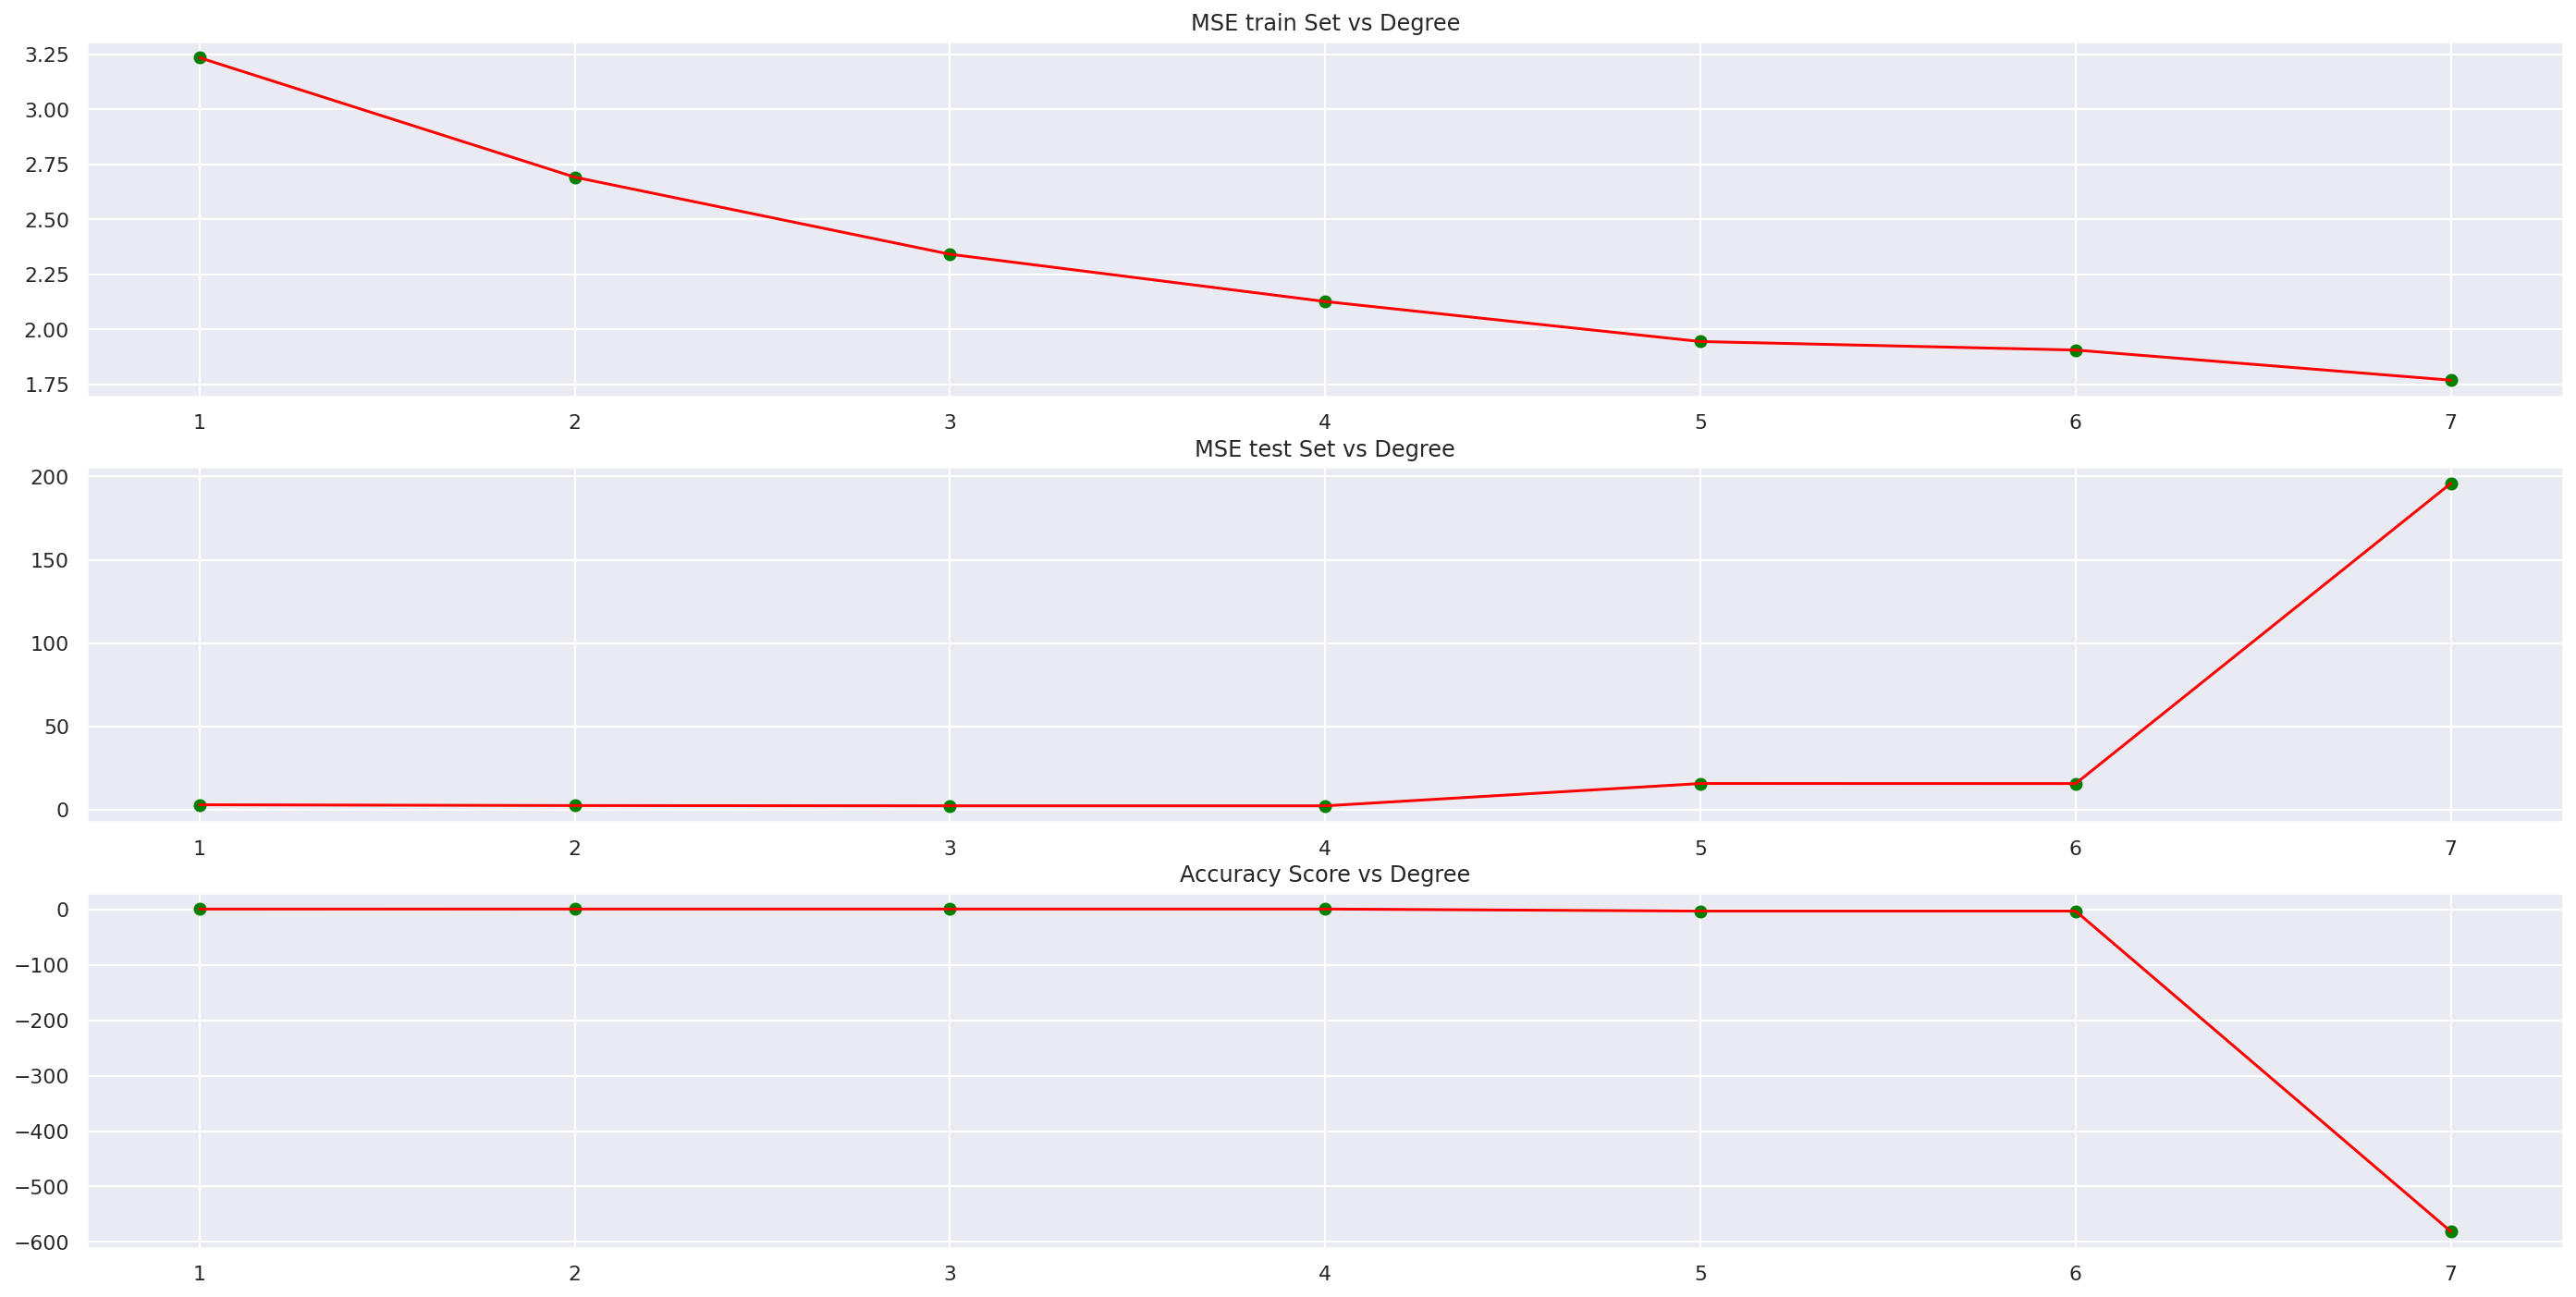

In [25]:
# Check the MSE with different Degree value, the lowest the better. Also, the higher score the better
number_degrees = [1,2,3,4,5,6,7]    # Can add more inside but with higher degree, it might overfit the data 
MSE_TrainSet = []     # Empty list to store the MSE for train for each degree
MSE_TestSet = []      # Empty List to store the MSE for test for each degree
scores = []           # List to store the accuracy score for test set for each degree
for degree in number_degrees:
    print("Degree :\t", degree)
    
    poly_model = PolynomialFeatures(degree = degree)
    poly_x_train = poly_model.fit_transform(X_train)
    
    poly_x_test = poly_model.fit_transform(X_test)

    poly_model.fit(poly_x_train, y_train)

    regression_model = LinearRegression()

    model = regression_model.fit(poly_x_train, y_train)

    y_train_pred = model.predict(poly_x_train)
    y_test_pred = model.predict(poly_x_test)

    train_score = model.score(poly_x_train,y_train)
    test_score = model.score(poly_x_test,y_test)
    
    MSETrain = mean_squared_error(y_train, y_train_pred, squared=False)
    MSETest = mean_squared_error(y_test, y_test_pred, squared=False)
    
    scores.append(test_score)
    print("MSE train:\t", MSETrain)
    print("MSE test:\t", MSETest)
    print("train score:\t",train_score)
    print("test score: \t",test_score, "\n")
    
    MSE_TrainSet.append(MSETrain)
    MSE_TestSet.append(MSETest)
    
# Print MSE with different degree values
f, axes = plt.subplots(3, figsize=(24, 12))
axes[0].set_title("MSE train Set vs Degree")
axes[0].scatter(number_degrees,MSE_TrainSet, color="green")
axes[0].plot(number_degrees,MSE_TrainSet, color="red") 

axes[1].set_title("MSE test Set vs Degree")
axes[1].scatter(number_degrees,MSE_TestSet, color="green")
axes[1].plot(number_degrees,MSE_TestSet, color="red") 

axes[2].set_title("Accuracy Score vs Degree")
axes[2].scatter(number_degrees,scores, color="green")
axes[2].plot(number_degrees,scores, color="red") 

# auto calculated the lowest MSE degree on test set

# Take note here, this 2 should be the same index in order to determine that that might be the best degree
Best_Degree_MSE = MSE_TestSet.index(min(MSE_TestSet))+1
print("The lowest MSE degree: \t",Best_Degree_MSE)
Best_Degree_Score = scores.index(max(scores))+1
print("The highest Accuracy degree: \t",Best_Degree_Score)

## Final Result after loop

In [26]:
poly_model = PolynomialFeatures(degree = Best_Degree_Score)
poly_x_train = poly_model.fit_transform(X_train)
    
poly_x_test = poly_model.fit_transform(X_test)

poly_model.fit(poly_x_train, y_train)

regression_model = LinearRegression()

model = regression_model.fit(poly_x_train, y_train)

y_train_pred = model.predict(poly_x_train)
y_test_pred = model.predict(poly_x_test)

train_score = model.score(poly_x_train,y_train)
test_score = model.score(poly_x_test,y_test)
    
MSETrain = mean_squared_error(y_train, y_train_pred, squared=False)
MSETest = mean_squared_error(y_test, y_test_pred, squared=False)

print("MSE train:\t", MSETrain)
print("MSE test:\t", MSETest)
print("train score:\t",train_score)
print("test score: \t",test_score, "\n")

MSE train:	 2.3414630793407496
MSE test:	 2.4047557589656026
train score:	 0.933057313772272
test score: 	 0.9122553243702117 



### Things to note

 1) The test data set accuracy always weighs higher than train data set 
 2) Can change x to have more variables but probably not more than 5 (Can add in BMI and HIV) will produce a slightly better accuracy
 3) If havent do the cleaning to take out NULL values, the NULL values can be either took out the whole row, or change the NULL values to the mean of that column
4) Also, do take out the values that is outliers to certain variables as with polynomial regression, it will affect the data



### Some knowledge about Polynomial Regression

1) Polynomial regression is like an upgrade of linear regression in which the relationship between the variable is modeled as nth degree of polynomial. 
2) In the above case, it is hard to do visualization as the model is too huge that its hard to see the polynomial as it have more than 60+ variables if the degree is 5-6 with 3 variables.
3) It goes in the way of x1y1z1 + x1y1z2 + ........ with 3 variables
4) Even though it is a nth degree, but it uses linear regression as a base